# Figures and analysis

This is the Jupyter notebook (Python3 kernel) containing scripts about producing the main figures and analytical results of the manuscript "Fitness inference from deep mutational scanning data". In this notebook, we organize all the inference results of the paper and pass them to multiple functions in figure.py (available at './src' folder of this Github repository) to generate all the visualizations. All the necessary packages version could be found in package section in the notebook and figure.py, or more convenient way is to run the setup.py in the repository. All the figures would be collected as PDF format in the './figures' folder of the repository.

# Contents
* [Libraries and variables](#package)
* [Figures and data analysis](#figure)
    * [Figure 1. Wright-Fisher simulation and mutational effects inference](#simulation)
    * [Figure 2. MPL is more consistent across replicates than current methods](#performance)
    * [Figure 3. Visualizations of MPL_DMS](#visualization)

## Libraries and variables<a class = "anchor" id = "package"></a>

In [1]:
# Full library list and version numbers

print('The necessary packages and corresponding version:')

import os
import sys
print('python ==', sys.version)

import numpy as np
print('numpy ==', np.__version__)

import scipy as sp
import scipy.stats as st
print('scipy ==', sp.__version__)

import pandas as pd
print('pandas ==', pd.__version__)

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
from matplotlib.font_manager import FontProperties
print('matplotlib ==', matplotlib.__version__)

import seaborn as sns 
print('seaborn ==', sns.__version__)

import logomaker as lm

from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings("ignore")


# Plot variables
TEXT_FONTSIZE = 6
SERIAL_FONTSIZE = 8
TEXT_FONT = 'Arial'
FIG_DPI = 400
CM = 1/2.54

SERIAL_FONT = {
    'family': TEXT_FONT,
    'size': SERIAL_FONTSIZE,
    'weight': 'bold'
}

FONT = {
    'family': TEXT_FONT,
    'weight': 'normal',
    'size': TEXT_FONTSIZE
}

REGION_FONT = {
    'family': TEXT_FONT,
    'weight': 'bold',
    'size': TEXT_FONTSIZE
}

matplotlib.rc('font', **FONT)

# File path
TRAJECTORY_PATH = './outputs/simulation/WF_finite_sampling/'
WF_INFERENCE_PATH = './outputs/simulation/WF_mutational_effects'
FIG_FILE = './figures/'


The necessary packages and corresponding version:
python == 3.7.6 (default, Dec 27 2019, 09:51:07) 
[Clang 11.0.0 (clang-1100.0.33.16)]
numpy == 1.16.3
scipy == 1.4.1
pandas == 0.24.2
matplotlib == 3.1.0
seaborn == 0.9.0


## Figures and data analysis<a class = "anchor" id = "figure"></a>

### Figure 1. Wright-Fisher simulation and mutational effects inference<a class = "anchor" id = "simulation"></a>

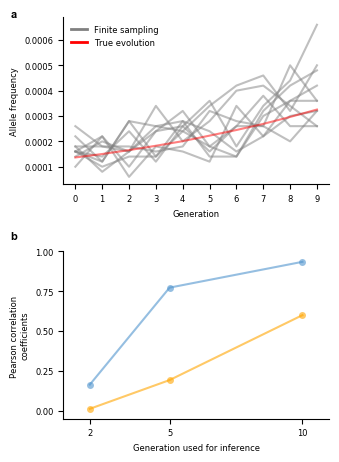

In [2]:
# Plot presetting
matplotlib.rc_file_defaults()

PAPER_FIGURE_SIZE_X = 9
PAPER_FIGURE_SIZE_Y = 12
TRAJECTORY_SCALE = 'linear'

LETTER_A_POS = {
    'x': 0.05,
    'y': 0.95
}
LETTER_B_POS = {
    'x': 0.05,
    'y': 0.48
}

VARIANT='F'
SIMULATION_HSPACE = 0.4
NUM_TRAJECTORY = 10
PERFORMANCE_MARKER_SIZE = 5
TRAJECTORY_GENERATION = 10

BOX_FIGURE1 = dict(left=0.2, right=0.95, bottom=0.1, top=0.95)
fig = plt.figure(figsize=(PAPER_FIGURE_SIZE_X*CM,PAPER_FIGURE_SIZE_Y*CM))
gs = fig.add_gridspec(2, 1, hspace=SIMULATION_HSPACE, **BOX_FIGURE1)

fig.text(**LETTER_A_POS, s='a', **SERIAL_FONT, transform = fig.transFigure)
fig.text(**LETTER_B_POS, s='b', **SERIAL_FONT, transform = fig.transFigure)

# Plot trajectories

ax1 = fig.add_subplot(gs[:1, 0])
ax1.set_xlabel('Generation', fontsize = TEXT_FONTSIZE)
ax1.set_ylabel('Allele frequency', fontsize = TEXT_FONTSIZE)
ax1.tick_params(axis='both', which='major', labelsize=TEXT_FONTSIZE)
ax1.set_yscale(TRAJECTORY_SCALE)
num_traj = 0
for entry in os.scandir(TRAJECTORY_PATH+'gen-'+str(TRAJECTORY_GENERATION)+'_sampling-50000/'):
    if num_traj < 10:
        num_traj += 1
        if entry.path.endswith(".csv") and entry.is_file():
            df_trajectory = pd.read_csv(entry.path, index_col=0)
            col_list = df_trajectory.columns.tolist()
            col_list.remove('generation')
            for i in [VARIANT]:
                ax1.plot(df_trajectory['generation'], df_trajectory[i], color='grey', alpha=0.5)
    else:
#         print(df_trajectory)
        continue

df_trajectory = pd.read_csv('./outputs/simulation/WF_simulation.csv', index_col=0)
col_list = df_trajectory.T.columns.tolist()
for i in [VARIANT]:
    ax1.plot(df_trajectory.columns[:TRAJECTORY_GENERATION], df_trajectory.T[i][:TRAJECTORY_GENERATION], color='red', alpha=0.5)

legend_elements = [Line2D([0], [0], color='grey', lw=2, label='Finite sampling'),
                   Line2D([0], [0], color='red', lw=2, label='True evolution')]
ax1.legend(handles=legend_elements, frameon=False, fontsize=TEXT_FONTSIZE)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)






ax2 = fig.add_subplot(gs[1:, 0])
generation = 10
replicates = 100
sample_index = 10

generations=[1, 4, 9, 19]
# finite_list = [10000, 50000, 100000]
finite_list = [50000]

replicates = 100
marker = ['o', 'v', '*']
generation_ = [i+1 for i in generations[:-1]]

for finite_sampling in finite_list:
    temp = [[],[],[],[]]
    for generation in generation_:

        df_select = pd.read_csv('./outputs/simulation/WF_mutational_effects/selection_coefficients/'+'gen-%s_'%generation+'sampling-%s'%finite_sampling+'.csv', index_col=0)
        df_enrichment_regress = pd.read_csv('./outputs/simulation/WF_mutational_effects/log_regression/'+'gen-%s_'%generation+'sampling-%s'%finite_sampling+'.csv', index_col=0)
        df_enrichment_ratio = pd.read_csv('./outputs/simulation/WF_mutational_effects/enrichment_ratio/'+'gen-%s_'%generation+'sampling-%s'%finite_sampling+'.csv', index_col=0)
        df_enrichment_ratio_log = pd.read_csv('./outputs/simulation/WF_mutational_effects/enrichment_ratio_log/'+'gen-%s_'%generation+'sampling-%s'%finite_sampling+'.csv', index_col=0)

        enrichment_ratio_corr = df_enrichment_ratio[df_enrichment_ratio.columns[1:]].T.corr(method='pearson')
        log_regression_corr = df_enrichment_regress[df_enrichment_regress.columns[1:]].T.corr(method='pearson')
        selection_coefficients_corr = df_select[df_select.columns[1:]].T.corr(method='pearson')
        enrichment_ratio_log_corr = df_enrichment_ratio_log[df_enrichment_ratio_log.columns[1:]].T.corr(method='pearson')
        
        enrichment_ratio_corr = (enrichment_ratio_corr.sum().sum() - replicates)/(replicates*replicates-replicates)
        log_regression_corr = (log_regression_corr.sum().sum() - replicates)/(replicates*replicates-replicates)
        selection_coefficients_corr = (selection_coefficients_corr.sum().sum() - replicates)/(replicates*replicates-replicates)  
        enrichment_ratio_log_corr = (enrichment_ratio_log_corr.sum().sum() - replicates)/(replicates*replicates-replicates)
      
        enrichment_ratio_corr = df_enrichment_ratio.T.corr(method='pearson')
        log_regression_corr = df_enrichment_regress.T.corr(method='pearson')
        selection_coefficients_corr = df_select.T.corr(method='pearson')
        enrichment_ratio_log_corr = df_enrichment_ratio_log.T.corr(method='pearson')
        
        enrichment_ratio_corr = (enrichment_ratio_corr.sum().sum() - replicates)/(replicates*replicates-replicates)
        log_regression_corr = (log_regression_corr.sum().sum() - replicates)/(replicates*replicates-replicates)
        selection_coefficients_corr = (selection_coefficients_corr.sum().sum() - replicates)/(replicates*replicates-replicates)  
        enrichment_ratio_log_corr = (enrichment_ratio_log_corr.sum().sum() - replicates)/(replicates*replicates-replicates)
        
        temp[0].append(enrichment_ratio_corr)
        temp[1].append(log_regression_corr)
        temp[2].append(selection_coefficients_corr)
        temp[3].append(enrichment_ratio_log_corr)

#     ax2.plot(generation_, temp[0], c='red', marker=marker[finite_list.index(finite_sampling)], markersize=PERFORMANCE_MARKER_SIZE, markeredgewidth=0,alpha=0.6)
#     ax2.plot(generation_, temp[1], c='green', marker=marker[finite_list.index(finite_sampling)], markersize=PERFORMANCE_MARKER_SIZE, markeredgewidth=0,alpha=0.6)
    ax2.plot(generation_, temp[2], c='#4F94CD', marker=marker[finite_list.index(finite_sampling)], markersize=PERFORMANCE_MARKER_SIZE, markeredgewidth=0,alpha=0.6)      
    ax2.plot(generation_, temp[3], c='orange', marker=marker[finite_list.index(finite_sampling)], markersize=PERFORMANCE_MARKER_SIZE, markeredgewidth=0,alpha=0.6)      
    ax2.set_xlabel('Generation used for inference', fontsize=TEXT_FONTSIZE)
    ax2.set_ylabel('Pearson correlation \ncoefficients', fontsize=TEXT_FONTSIZE)
    ax2.set_xticks([2,5,10])
    ax2.set_xlim([0,11])
    ax2.set_ylim([-0.05,1])
    
# legend_size = [Line2D([0], [0], marker='*', color='grey', label='100000', markersize=10),
#                Line2D([0], [0], marker='v', color='grey', label='50000', markersize=10),
#                Line2D([0], [0], marker='o', color='grey', label='10000', markersize=10)]
legend_method = [Line2D([0], [0], color='#4F94CD', lw=2, label='Selection coefficients', alpha=0.6),
               Line2D([0], [0], color='red', lw=2, label='Enrichment ratio', alpha=0.6),
               Line2D([0], [0], color='orange', lw=2, label='Log scaled ratio', alpha=0.6),
               Line2D([0], [0], color='green', lw=2, label='Log regression', alpha=0.6)]

# leg = ax2.legend(handles=legend_size, loc=[1.15,0.2], title='Finite sampling size', frameon=False)
# ax2.add_artist(leg)
# ax2.legend(handles=legend_method, loc=[0.02, 0.7], frameon=False, fontsize=TEXT_FONTSIZE)
ax2.set_yticks([0,0.25,0.5,0.75,1])
ax2.set_xlim([1,11])
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.tick_params(axis='both', which='major', labelsize=TEXT_FONTSIZE)

fig.savefig(FIG_FILE+'Fig1_simulation.pdf', dpi=FIG_DPI)
plt.show()


### Figure 2. MPL is more consistent across replicates than current methods<a class = "anchor" id = "performance"></a>

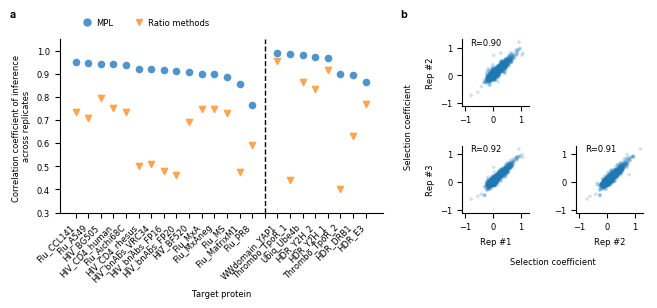

In [3]:
# Performance presetting
matplotlib.rc_file_defaults()
matplotlib.rc('text', usetex=False)
PAPER_FIGURE_SIZE_X = 18
PAPER_FIGURE_SIZE_Y = 8
PERFORMANCE_WIDTH = 2
PERFORMANCE_DIR_VIRUS = './outputs/virus_protein/'
PERFORMANCE_DIR_HUMAN = './outputs/human_protein/'
PERFORMANCE_VIRUS_PREF = './data/virus_protein/'
PERFORMANCE_HUMAN_PREF = './data/human_protein/'
PERFORMANCE_MPL_COLOR = '#4F94CD'#'blue'
PERFORMANCE_MPL_MARKER = 'o'
PERFORMANCE_ENRICH_COLOR = '#FFA54F'#'orange'
PERFORMANCE_ENRICH_MARKER = 'v'
PERFORMANCE_SCATTER_SIZE= 20

VIRUS_PROTEIN_RESULT_DIR = {
                   'Flu_A549': ['PB2/A549/', 3],
                   'Flu_CCL141': ['PB2/CCL141/', 3],
                   'Flu_Aichi68C': ['Aichi68C_PR8/Aichi68C/', 2],
                   'Flu_PR8': ['Aichi68C_PR8/PR8/', 2],
                   'Flu_MatrixM1': ['Matrix_M1/', 3],
                   'Flu_MS': ['MxA/MS/', 2],
                   'Flu_MxA': ['MxA/MxA/', 2],
                   'Flu_MxAneg': ['MxA/MxAneg/', 2],
                   'HIV_BG505': ['HIVEnv/BG505/', 3],
                   'HIV_BF520': ['HIVEnv/BF520/', 3],
                   'HIV_CD4_human': ['HIVEnv_CD4/BF520_human/', 2],
                   'HIV_CD4_rhesus': ['HIVEnv_CD4/BF520_rhesus/', 2],
                   'HIV_bnAbs_FP16': ['HIV_bnAbs/FP16/', 2],
                   'HIV_bnAbs_FP20': ['HIV_bnAbs/FP20/', 2],
                   'HIV_bnAbs_VRC34': ['HIV_bnAbs/VRC34/', 2]
                   }
HUMAN_PROTEIN_RESULT_DIR = {   
                   'HDR_Y2H_1': ['BRCA1/Y2H_1/', 3],
                   'HDR_Y2H_2': ['BRCA1/Y2H_2/', 3],
                   'HDR_E3': ['BRCA1/E3/', 6],
                   'WWdomain_YAP1': ['YAP1/', 2],
                   'Ubiq_Ube4b': ['Ube4b/', 2],
                   'HDR_DRB1': ['DRB1/', 2],
                   'Thrombo_TpoR_1': ['TpoR/TpoR_MPL/', 6],
                   'Thrombo_TpoR_2': ['TpoR/TpoR_S505NMPL/', 6]
                   }


PERFORMANCE_ENRICH_AVERAGE = {}
PERFORMANCE_SELECTION_AVERAGE = {}
for target_protein, info in VIRUS_PROTEIN_RESULT_DIR.items():
    path = PERFORMANCE_DIR_VIRUS+info[0]+'selection_coefficients/'
    for file in os.listdir(path):
        if file.endswith('.csv.gz'):
            df_temp = pd.read_csv(path+file)
            df_temp = df_temp[(df_temp['rep_1']!=0)&(df_temp['rep_2']!=0)]
            df_corr = df_temp[df_temp.columns[2:]]
            correlation_average = (df_corr.corr().sum().sum()-df_corr.shape[1])/(df_corr.shape[1]**2-df_corr.shape[1])
            PERFORMANCE_SELECTION_AVERAGE[target_protein] = correlation_average
            
for protein, info_list in VIRUS_PROTEIN_RESULT_DIR.items():
    SELECTION_LIST = []
    ENRICH_LIST = []
    replicate = info_list[1]
    for file in os.listdir(PERFORMANCE_VIRUS_PREF+info_list[0]+'pref'):
        if '.DS_Store' in file:
            continue
        else:
            FILE_PATH = PERFORMANCE_VIRUS_PREF+info_list[0]+'pref/'+file
            temp_df = pd.read_csv(FILE_PATH, index_col=0)
            ENRICH_LIST.append(list(temp_df.values.flatten()))
        
    correlation_average = 0
    for i in range(len(ENRICH_LIST)):
        for j in range(i+1, len(ENRICH_LIST)):
            correlation_average += st.pearsonr(ENRICH_LIST[i], ENRICH_LIST[j])[0]
    if correlation_average == 0:
        PERFORMANCE_ENRICH_AVERAGE[protein] = correlation_average
    else:  
        correlation_average /= len(ENRICH_LIST)*(len(ENRICH_LIST)-1)/2
        PERFORMANCE_ENRICH_AVERAGE[protein] = correlation_average
    if 'HIV_bnAbs' in protein or 'Flu_MS' in protein or 'Flu_Mx' in protein:
        FILE_PATH = PERFORMANCE_VIRUS_PREF+info_list[0]+'pref/enrichment.csv.gz'
        temp_df = pd.read_csv(FILE_PATH)
        correlation_average = (temp_df.corr().sum().sum()-temp_df.shape[1])/(temp_df.shape[1]**2-temp_df.shape[1])
        PERFORMANCE_ENRICH_AVERAGE[protein] = correlation_average


BOX_FIGURE2 = dict(left=0.12, right=0.95, bottom=0.3, top=0.85)
PERFORMANCE_FIG_SIZE = (PAPER_FIGURE_SIZE_X*CM, PAPER_FIGURE_SIZE_Y*CM)
fig = plt.figure(figsize=PERFORMANCE_FIG_SIZE)
fig.text(0.05,0.92,s='a', **SERIAL_FONT, transform = fig.transFigure)
fig.text(0.6,0.92,s='b', **SERIAL_FONT, transform = fig.transFigure)
gs = fig.add_gridspec(2,5, wspace=1.3, **BOX_FIGURE2)

ax = fig.add_subplot(gs[:2,:3])
ax2 = fig.add_subplot(gs[:2,3:])
ax.set_xlabel('Target protein', fontsize = TEXT_FONTSIZE)
ax.set_ylabel('Correlation coefficient of inference \nacross replicates', fontsize = TEXT_FONTSIZE)

MPL_LIST = PERFORMANCE_SELECTION_AVERAGE.items()
MPL_LIST = sorted(MPL_LIST, key=lambda x: x[1], reverse=True)
x, y = zip(*MPL_LIST)
ax.scatter(x, y, marker = PERFORMANCE_MPL_MARKER, color = PERFORMANCE_MPL_COLOR, s = PERFORMANCE_SCATTER_SIZE)
ENRICH_LIST = PERFORMANCE_ENRICH_AVERAGE.items()
x_, y_ = zip(*ENRICH_LIST)
ax.scatter(x_, y_, marker = PERFORMANCE_ENRICH_MARKER, color = PERFORMANCE_ENRICH_COLOR, s = PERFORMANCE_SCATTER_SIZE)
labels = x
ax.set_xticklabels(labels, rotation=45, ha='right')

# ax.text(MPL_LIST[-3][0], 0.35, 'Virus', fontsize = TEXT_FONTSIZE, bbox=dict(facecolor='none', edgecolor='none', boxstyle='round'))

# human
PERFORMANCE_ENRICH_AVERAGE = {}
PERFORMANCE_SELECTION_AVERAGE = {}
PERFORMANCE_SELECTION_AVERAGE[' '] = 100
for target_protein, info in HUMAN_PROTEIN_RESULT_DIR.items():
#     print(target_protein)
    path = PERFORMANCE_DIR_HUMAN+info[0]+'selection_coefficients/'
    for file in os.listdir(path):
        if file.endswith('.csv.gz'):
            df_temp = pd.read_csv(path+file)
            df_temp = df_temp[(df_temp['rep_1']!=0)&(df_temp['rep_2']!=0)]
            df_corr = df_temp[df_temp.columns[2:]]
            correlation_average = (df_corr.corr().sum().sum()-df_corr.shape[1])/(df_corr.shape[1]**2-df_corr.shape[1])
            PERFORMANCE_SELECTION_AVERAGE[target_protein] = correlation_average

for protein, info_list in HUMAN_PROTEIN_RESULT_DIR.items():
    SELECTION_LIST = []
    ENRICH_LIST = []
    replicate = info_list[1]
    
    for file in os.listdir(PERFORMANCE_HUMAN_PREF+info_list[0]+'pref'):
        FILE_PATH = PERFORMANCE_HUMAN_PREF+info_list[0]+'pref/'+file
        if 'enrichment.csv.gz' in FILE_PATH:
            temp_df = pd.read_csv(FILE_PATH, index_col=0)
            if 'hgvs_pro' in temp_df.columns:
                temp_df = temp_df[~temp_df['hgvs_pro'].str.contains('\[')]
            df_corr = temp_df[temp_df.columns.tolist()[-info_list[1]:]]
            df_corr = df_corr.dropna()
            correlation_average = (df_corr.corr().sum().sum()-df_corr.shape[1])/(df_corr.shape[1]**2-df_corr.shape[1])
            PERFORMANCE_ENRICH_AVERAGE[protein] = correlation_average
#             print(PERFORMANCE_ENRICH_AVERAGE)

# print(PERFORMANCE_ENRICH_AVERAGE)


MPL_LIST = PERFORMANCE_SELECTION_AVERAGE.items()
MPL_LIST = sorted(MPL_LIST, key=lambda x: x[1], reverse=True)
x, y = zip(*MPL_LIST)
ax.scatter(x, y, marker = PERFORMANCE_MPL_MARKER, color = PERFORMANCE_MPL_COLOR, s = PERFORMANCE_SCATTER_SIZE)

ENRICH_LIST = PERFORMANCE_ENRICH_AVERAGE.items()
x_, y_ = zip(*ENRICH_LIST)
ax.scatter(x_, y_, marker = PERFORMANCE_ENRICH_MARKER, color = PERFORMANCE_ENRICH_COLOR, s = PERFORMANCE_SCATTER_SIZE)
labels = labels+x
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_ylim(top=1.05, bottom=0.3)
ax.axvline(x=' ', ls='--', color='black', lw=1)

# ax.text(MPL_LIST[2][0], 0.35, 'Human', fontsize = TEXT_FONTSIZE, bbox=dict(facecolor='none', edgecolor='none', boxstyle='round'))
legend_elements = [
                    Line2D([0], [0], marker='o', linestyle='None',
                          color=PERFORMANCE_MPL_COLOR, label='MPL', markersize=5),
                    Line2D([0], [0], marker='v', linestyle='None',
                          color=PERFORMANCE_ENRICH_COLOR, label='Ratio methods', markersize=5)
                   ]
ax.legend(handles=legend_elements, loc=[0.05,1.05],ncol=2, frameon=False, fontsize=TEXT_FONTSIZE,handletextpad=0.1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=TEXT_FONTSIZE)





# Scatter plot of sample experiment

REPLICATE_NUM = 3
SCATTER_SAMPLE_PATH = './outputs/virus_protein/HIVEnv/BF520/selection_coefficients/'
# SCATTER_SELECTION_SUFFIX = '_sMPL_100.dat'
SMAPLE_SCATTER_SIZE = 7
SCATTER_ALPHA = 0.4
SCATTER_COLOR = 'orange'
CORR_DIGIT = 2

inner = gridspec.GridSpecFromSubplotSpec(2,2,
                                         hspace=0.6,
                                         wspace=0.5,
                                         subplot_spec=ax2, 
                                         height_ratios=[1,1], width_ratios=[1,1])

SELECTION_LIST = []
for file in os.listdir(SCATTER_SAMPLE_PATH):
    if file.endswith('.csv.gz'):
        df_temp = pd.read_csv(SCATTER_SAMPLE_PATH+file)
        df_temp = df_temp[(df_temp['rep_1']!=0)&(df_temp['rep_2']!=0)]
        for rep in range(1, REPLICATE_NUM+1):
            SELECTION_LIST.append(df_temp['rep_'+str(rep)].tolist())
ax2.set_yticks([])
ax2.set_xticks([])

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

SCATTER_DOT = {
    'alpha':0.2,
    'edgecolor':'none',
    's':SMAPLE_SCATTER_SIZE
}

for i in range(3):
    for j in range(i+1,3):
        CORR = round(st.pearsonr(SELECTION_LIST[i], SELECTION_LIST[j])[0], CORR_DIGIT)
        if i==0 and j==1:
            ax2_sub = plt.Subplot(fig, inner[0,0])
            ax2_sub.scatter(SELECTION_LIST[i], SELECTION_LIST[j], **SCATTER_DOT)

            ax2_sub.set_ylabel('Rep #2', fontsize=TEXT_FONTSIZE)
        if i==0 and j==2:
            ax2_sub = plt.Subplot(fig, inner[1,0])
            ax2_sub.scatter(SELECTION_LIST[i], SELECTION_LIST[j], **SCATTER_DOT)
            ax2_sub.set_ylabel('Rep #3', fontsize=TEXT_FONTSIZE)
            ax2_sub.set_xlabel('Rep #1', fontsize=TEXT_FONTSIZE)
        if i==1 and j==2:
            ax2_sub = plt.Subplot(fig, inner[1,1])
            ax2_sub.scatter(SELECTION_LIST[i], SELECTION_LIST[j], **SCATTER_DOT)
            ax2_sub.set_xlabel('Rep #2', fontsize=TEXT_FONTSIZE)
            
        ax2_sub.text(-0.8, 1.1, 'R=%.2f'%CORR, fontsize = TEXT_FONTSIZE)
        ax2_sub.set_yticks([-1,0,1])
        ax2_sub.set_xticks([-1,0,1])
        ax2_sub.set_xlim([-1.1, 1.3])
        ax2_sub.set_ylim([-1.1, 1.3])
        fig.add_subplot(ax2_sub)
        ax2_sub.spines['right'].set_visible(False)
        ax2_sub.spines['top'].set_visible(False)
        ax2_sub.tick_params(axis='both', which='major', labelsize=TEXT_FONTSIZE)
        ax2_sub.set_aspect('equal')
ax2.set_xlabel('Selection coefficient', fontsize=TEXT_FONTSIZE, labelpad=32) 
ax2.set_ylabel('Selection coefficient', fontsize=TEXT_FONTSIZE, labelpad=32) 
fig.savefig(FIG_FILE+'Fig2_comparison.pdf', dpi=400)
plt.show()


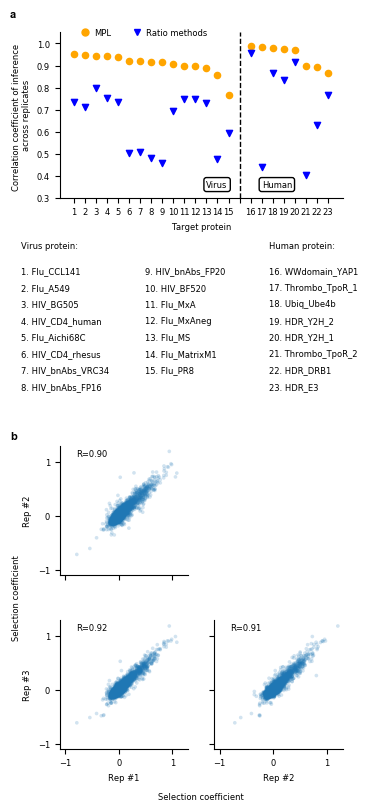

In [5]:
# Performance presetting
matplotlib.rc_file_defaults()
matplotlib.rc('text', usetex=False)
PAPER_FIGURE_SIZE_X = 9
PAPER_FIGURE_SIZE_Y = 21
PERFORMANCE_WIDTH = 2
PERFORMANCE_DIR_VIRUS = './outputs/virus_protein/'
PERFORMANCE_DIR_HUMAN = './outputs/human_protein/'
PERFORMANCE_VIRUS_PREF = './data/virus_protein/'
PERFORMANCE_HUMAN_PREF = './data/human_protein/'
PERFORMANCE_MPL_COLOR = 'orange'
PERFORMANCE_MPL_MARKER = 'o'
PERFORMANCE_ENRICH_COLOR = 'blue'
PERFORMANCE_ENRICH_MARKER = 'v'
PERFORMANCE_SCATTER_SIZE= 20

VIRUS_PROTEIN_RESULT_DIR = {
                   'Flu_A549': ['PB2/A549/', 3],
                   'Flu_CCL141': ['PB2/CCL141/', 3],
                   'Flu_Aichi68C': ['Aichi68C_PR8/Aichi68C/', 2],
                   'Flu_PR8': ['Aichi68C_PR8/PR8/', 2],
                   'Flu_MatrixM1': ['Matrix_M1/', 3],
                   'Flu_MS': ['MxA/MS/', 2],
                   'Flu_MxA': ['MxA/MxA/', 2],
                   'Flu_MxAneg': ['MxA/MxAneg/', 2],
                   'HIV_BG505': ['HIVEnv/BG505/', 3],
                   'HIV_BF520': ['HIVEnv/BF520/', 3],
                   'HIV_CD4_human': ['HIVEnv_CD4/BF520_human/', 2],
                   'HIV_CD4_rhesus': ['HIVEnv_CD4/BF520_rhesus/', 2],
                   'HIV_bnAbs_FP16': ['HIV_bnAbs/FP16/', 2],
                   'HIV_bnAbs_FP20': ['HIV_bnAbs/FP20/', 2],
                   'HIV_bnAbs_VRC34': ['HIV_bnAbs/VRC34/', 2]
                   }
HUMAN_PROTEIN_RESULT_DIR = {   
                   'HDR_Y2H_1': ['BRCA1/Y2H_1/', 3],
                   'HDR_Y2H_2': ['BRCA1/Y2H_2/', 3],
                   'HDR_E3': ['BRCA1/E3/', 6],
                   'WWdomain_YAP1': ['YAP1/', 2],
                   'Ubiq_Ube4b': ['Ube4b/', 2],
                   'HDR_DRB1': ['DRB1/', 2],
                   'Thrombo_TpoR_1': ['TpoR/TpoR_MPL/', 6],
                   'Thrombo_TpoR_2': ['TpoR/TpoR_S505NMPL/', 6]
                   }


PERFORMANCE_ENRICH_AVERAGE = {}
PERFORMANCE_SELECTION_AVERAGE = {}
for target_protein, info in VIRUS_PROTEIN_RESULT_DIR.items():
    path = PERFORMANCE_DIR_VIRUS+info[0]+'selection_coefficients/'
    for file in os.listdir(path):
        if file.endswith('.csv.gz'):
            df_temp = pd.read_csv(path+file)
            df_temp = df_temp[(df_temp['rep_1']!=0)&(df_temp['rep_2']!=0)]
            df_corr = df_temp[df_temp.columns[2:]]
            correlation_average = (df_corr.corr().sum().sum()-df_corr.shape[1])/(df_corr.shape[1]**2-df_corr.shape[1])
            PERFORMANCE_SELECTION_AVERAGE[target_protein] = correlation_average
            
for protein, info_list in VIRUS_PROTEIN_RESULT_DIR.items():
    SELECTION_LIST = []
    ENRICH_LIST = []
    replicate = info_list[1]
    for file in os.listdir(PERFORMANCE_VIRUS_PREF+info_list[0]+'pref'):
        if '.DS_Store' in file:
            continue
        else:
            FILE_PATH = PERFORMANCE_VIRUS_PREF+info_list[0]+'pref/'+file
            temp_df = pd.read_csv(FILE_PATH, index_col=0)
            ENRICH_LIST.append(list(temp_df.values.flatten()))
        
    correlation_average = 0
    for i in range(len(ENRICH_LIST)):
        for j in range(i+1, len(ENRICH_LIST)):
            correlation_average += st.pearsonr(ENRICH_LIST[i], ENRICH_LIST[j])[0]
    if correlation_average == 0:
        PERFORMANCE_ENRICH_AVERAGE[protein] = correlation_average
    else:  
        correlation_average /= len(ENRICH_LIST)*(len(ENRICH_LIST)-1)/2
        PERFORMANCE_ENRICH_AVERAGE[protein] = correlation_average
    if 'HIV_bnAbs' in protein or 'Flu_MS' in protein or 'Flu_Mx' in protein:
        FILE_PATH = PERFORMANCE_VIRUS_PREF+info_list[0]+'pref/enrichment.csv.gz'
        temp_df = pd.read_csv(FILE_PATH)
        correlation_average = (temp_df.corr().sum().sum()-temp_df.shape[1])/(temp_df.shape[1]**2-temp_df.shape[1])
        PERFORMANCE_ENRICH_AVERAGE[protein] = correlation_average


BOX_FIGURE2 = dict(left=0.15, right=0.95, bottom=0.07, top=1.07)
PERFORMANCE_FIG_SIZE = (PAPER_FIGURE_SIZE_X*CM, PAPER_FIGURE_SIZE_Y*CM)
fig = plt.figure(figsize=PERFORMANCE_FIG_SIZE)
fig.text(0.01,0.98,s='a', **SERIAL_FONT, transform = fig.transFigure)
fig.text(0.01,0.47,s='b', **SERIAL_FONT, transform = fig.transFigure)
gs = fig.add_gridspec(2,1, hspace=0.4, height_ratios=[1,1],**BOX_FIGURE2)

ax = fig.add_subplot(gs[:1,:1],aspect=20)
ax2 = fig.add_subplot(gs[1:,:1])
ax.set_xlabel('Target protein', fontsize = TEXT_FONTSIZE)
ax.set_ylabel('Correlation coefficient of inference \nacross replicates', fontsize = TEXT_FONTSIZE)

MPL_LIST = PERFORMANCE_SELECTION_AVERAGE.items()
MPL_LIST = sorted(MPL_LIST, key=lambda x: x[1], reverse=True)
x, y = zip(*MPL_LIST)
ax.scatter(x, y, marker = PERFORMANCE_MPL_MARKER, color = PERFORMANCE_MPL_COLOR, s = PERFORMANCE_SCATTER_SIZE)
ENRICH_LIST = PERFORMANCE_ENRICH_AVERAGE.items()
x_, y_ = zip(*ENRICH_LIST)
ax.scatter(x_, y_, marker = PERFORMANCE_ENRICH_MARKER, color = PERFORMANCE_ENRICH_COLOR, s = PERFORMANCE_SCATTER_SIZE)
# labels = x
# ax.set_xticklabels(labels, rotation=45, ha='right')
data_set = [i for i in x]
labels = tuple(i for i in [i for i in range(1,len(x)+1)])
virus_length = len(labels)
ax.set_xticklabels(labels, ha='right')
ax.text(MPL_LIST[-3][0], 0.35, 'Virus', fontsize = TEXT_FONTSIZE, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

# human
PERFORMANCE_ENRICH_AVERAGE = {}
PERFORMANCE_SELECTION_AVERAGE = {}
PERFORMANCE_SELECTION_AVERAGE[' '] = 100
for target_protein, info in HUMAN_PROTEIN_RESULT_DIR.items():
#     print(target_protein)
    path = PERFORMANCE_DIR_HUMAN+info[0]+'selection_coefficients/'
    for file in os.listdir(path):
        if file.endswith('.csv.gz'):
            df_temp = pd.read_csv(path+file)
            df_temp = df_temp[(df_temp['rep_1']!=0)&(df_temp['rep_2']!=0)]
            df_corr = df_temp[df_temp.columns[2:]]
            correlation_average = (df_corr.corr().sum().sum()-df_corr.shape[1])/(df_corr.shape[1]**2-df_corr.shape[1])
            PERFORMANCE_SELECTION_AVERAGE[target_protein] = correlation_average

for protein, info_list in HUMAN_PROTEIN_RESULT_DIR.items():
    SELECTION_LIST = []
    ENRICH_LIST = []
    replicate = info_list[1]
    
    for file in os.listdir(PERFORMANCE_HUMAN_PREF+info_list[0]+'pref'):
        FILE_PATH = PERFORMANCE_HUMAN_PREF+info_list[0]+'pref/'+file
        if 'enrichment.csv.gz' in FILE_PATH:
            temp_df = pd.read_csv(FILE_PATH, index_col=0)
            if 'hgvs_pro' in temp_df.columns:
                temp_df = temp_df[~temp_df['hgvs_pro'].str.contains('\[')]
            df_corr = temp_df[temp_df.columns.tolist()[-info_list[1]:]]
            df_corr = df_corr.dropna()
            correlation_average = (df_corr.corr().sum().sum()-df_corr.shape[1])/(df_corr.shape[1]**2-df_corr.shape[1])
            PERFORMANCE_ENRICH_AVERAGE[protein] = correlation_average
#             print(PERFORMANCE_ENRICH_AVERAGE)

# print(PERFORMANCE_ENRICH_AVERAGE)


MPL_LIST = PERFORMANCE_SELECTION_AVERAGE.items()
MPL_LIST = sorted(MPL_LIST, key=lambda x: x[1], reverse=True)
x, y = zip(*MPL_LIST)
ax.scatter(x, y, marker = PERFORMANCE_MPL_MARKER, color = PERFORMANCE_MPL_COLOR, s = PERFORMANCE_SCATTER_SIZE)

ENRICH_LIST = PERFORMANCE_ENRICH_AVERAGE.items()
x_, y_ = zip(*ENRICH_LIST)

ax.scatter(x_, y_, marker = PERFORMANCE_ENRICH_MARKER, color = PERFORMANCE_ENRICH_COLOR, s = PERFORMANCE_SCATTER_SIZE)
temp_label = [' ']+[i+virus_length for i in range(1,len(x))]
data_set = data_set+[i for i in x[1:]]
labels = labels+tuple(i for i in temp_label)

ax.set_xticklabels(labels,  ha='center')

ax.set_ylim(top=1.05, bottom=0.3)
ax.axvline(x=' ', ls='--', color='black', lw=1)

ax.text(MPL_LIST[2][0], 0.35, 'Human', fontsize = TEXT_FONTSIZE, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))
legend_elements = [
                    Line2D([0], [0], marker='o', linestyle='None',
                          color=PERFORMANCE_MPL_COLOR, label='MPL', markersize=5),
                    Line2D([0], [0], marker='v', linestyle='None',
                          color=PERFORMANCE_ENRICH_COLOR, label='Ratio methods', markersize=5)
                   ]
ax.legend(handles=legend_elements, loc=[0.05,0.95],ncol=2, frameon=False, fontsize=TEXT_FONTSIZE,handletextpad=0.1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=TEXT_FONTSIZE)

fig.text(0.04, 0.7,'Virus protein:', fontsize=TEXT_FONTSIZE)
for i in range(2):
    for j in range(8):
        if i*8+j<15:
            fig.text(0.04+i*0.35, 0.67-j*0.02,str(i*8+j+1)+'. '+data_set[i*8+j], fontsize=TEXT_FONTSIZE)
            
i=2
fig.text(0.04+i*0.35, 0.7,'Human protein:', fontsize=TEXT_FONTSIZE)
for j in range(8):
    fig.text(0.04+i*0.35, 0.67-j*0.02, str(i*8+j)+'. '+data_set[-8:][j], fontsize=TEXT_FONTSIZE)




# Scatter plot of sample experiment

REPLICATE_NUM = 3
SCATTER_SAMPLE_PATH = './outputs/virus_protein/HIVEnv/BF520/selection_coefficients/'
# SCATTER_SELECTION_SUFFIX = '_sMPL_100.dat'
SMAPLE_SCATTER_SIZE = 7
SCATTER_ALPHA = 0.4
SCATTER_COLOR = 'orange'
CORR_DIGIT = 2

inner = gridspec.GridSpecFromSubplotSpec(2,2,
                                         hspace=0.02,
                                         wspace=0.2,
                                         subplot_spec=ax2, 
                                         height_ratios=[1,1], width_ratios=[1,1])

SELECTION_LIST = []
for file in os.listdir(SCATTER_SAMPLE_PATH):
    if file.endswith('.csv.gz'):
        df_temp = pd.read_csv(SCATTER_SAMPLE_PATH+file)
        df_temp = df_temp[(df_temp['rep_1']!=0)&(df_temp['rep_2']!=0)]
        for rep in range(1, REPLICATE_NUM+1):
            SELECTION_LIST.append(df_temp['rep_'+str(rep)].tolist())
ax2.set_yticks([])
ax2.set_xticks([])

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

SCATTER_DOT = {
    'alpha':0.2,
    'edgecolor':'none',
    's':SMAPLE_SCATTER_SIZE
}

for i in range(3):
    for j in range(i+1,3):
        CORR = round(st.pearsonr(SELECTION_LIST[i], SELECTION_LIST[j])[0], CORR_DIGIT)
        if i==0 and j==1:
            ax2_sub = plt.Subplot(fig, inner[0,0])
            ax2_sub.scatter(SELECTION_LIST[i], SELECTION_LIST[j], **SCATTER_DOT)

            ax2_sub.set_ylabel('Rep #2', fontsize=TEXT_FONTSIZE)
            
        if i==0 and j==2:
            ax2_sub = plt.Subplot(fig, inner[1,0])
            ax2_sub.scatter(SELECTION_LIST[i], SELECTION_LIST[j], **SCATTER_DOT)
            ax2_sub.set_ylabel('Rep #3', fontsize=TEXT_FONTSIZE)
            ax2_sub.set_xlabel('Rep #1', fontsize=TEXT_FONTSIZE)
        if i==1 and j==2:
            ax2_sub = plt.Subplot(fig, inner[1,1])
            ax2_sub.scatter(SELECTION_LIST[i], SELECTION_LIST[j], **SCATTER_DOT)
            ax2_sub.set_xlabel('Rep #2', fontsize=TEXT_FONTSIZE)
            
        ax2_sub.text(-0.8, 1.1, 'R=%.2f'%CORR, fontsize = TEXT_FONTSIZE)
        ax2_sub.set_yticks([-1,0,1])
        ax2_sub.set_xticks([-1,0,1])
        ax2_sub.set_xlim([-1.1, 1.3])
        ax2_sub.set_ylim([-1.1, 1.3])
        if i==0 and j==1:
            ax2_sub.xaxis.set_ticklabels([])
        if i==1 and j==2:
            ax2_sub.yaxis.set_ticklabels([])

        fig.add_subplot(ax2_sub)
        ax2_sub.spines['right'].set_visible(False)
        ax2_sub.spines['top'].set_visible(False)
        ax2_sub.tick_params(axis='both', which='major', labelsize=TEXT_FONTSIZE)
        ax2_sub.set_aspect('equal')
ax2.set_xlabel('Selection coefficient', fontsize=TEXT_FONTSIZE, labelpad=16) 
ax2.set_ylabel('Selection coefficient', fontsize=TEXT_FONTSIZE, labelpad=28)


fig.savefig(FIG_FILE+'Fig2_comparison.pdf', dpi=400)
plt.show()


### Figure 3. Visualizations of MPL_DMS<a class = "anchor" id = "visualization"></a>

In [4]:
def plot_logo_grid(selection_file, epistasis_file, index_matrix_file, sequence, exp_scale, sites_per_line, fig):
    AA  = sorted(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I','L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V', '*'])
#     print(AA)
    Amino_acid_dict = {'Ala':'A',
                       'Arg':'R',
                       'Asn':'N',
                       'Asp':'D',
                       'Cys':'C',
                       'Gln':'Q',
                       'Glu':'E',
                       'Gly':'G',
                       'His':'H',
                       'Ile':'I',
                       'Leu':'L',
                       'Lys':'K',
                       'Met':'M',
                       'Phe':'F',
                       'Pro':'P',
                       'Ser':'S',
                       'Thr':'T',
                       'Trp':'W',
                       'Tyr':'Y',
                       'Val':'V',
                       'Ter':'*'
                      }

    text_in_figure={
        'fontsize': TEXT_FONTSIZE,
        'bbox': {'facecolor':'none', 'edgecolor':'none','boxstyle':'round'},
        'ha': 'center',
        'va': 'center'
    }
    data = pd.read_csv(selection_file)
    site_list = data['site'].unique().tolist()
    rep_list = data.columns[2:]
    BOX_FIGURE3 = dict(left=0.065, right=1, bottom=0.1, top=0.9)
    gs = fig.add_gridspec(5, 6, 
                          wspace=1, 
                          hspace=3.5, 
                          width_ratios=[1,1,1,1.6,1.6,1.6], 
                          height_ratios=[1.2,1.2,1.6,1.6,1.6],**BOX_FIGURE3)
    ax1 = fig.add_subplot(gs[:2, :3])
    ax2 = fig.add_subplot(gs[:2, 3:])
    ax3 = fig.add_subplot(gs[2:, :3])
    ax4 = fig.add_subplot(gs[2:, 3:])
    MPL_scale=8
    PREF_scale=2
    for rep in [rep_list[0]]:
# logo plot
        data1 = data[['site', 'amino_acid', rep]]
        data1 = pd.pivot_table(data1, values = rep, index=['site'], columns = ['amino_acid']).reset_index()
        data1.set_index('site', inplace=True)
        data1 = data1.drop(['*'],axis=1)
        data1.replace(0, np.nan, inplace=True)
#         print(data1)
        totle_line_num = len(data1.columns)
        num_line = int(totle_line_num/sites_per_line)+1
#         ax = fig.add_subplot(gs[:1,:1])
        for i in range(num_line):
            if i != num_line -1:
                data_sub = data1[i*sites_per_line: (i+1)*sites_per_line]               
            else:
                data_sub = data1[i*sites_per_line:]
            site_sub = data_sub.columns.tolist()  

            data_exp = np.exp(MPL_scale*data_sub)
            data_exp = data_exp.div(data_exp.sum(axis=1), axis=0)
            
            data_exp = data_exp.replace(np.nan, 0)
            #print(data_exp)

            logo = lm.Logo(data_exp, 
                           ax = ax1,
                           figsize = [15* len(site_sub)/sites_per_line,4],
                           font_name = 'Arial Rounded MT Bold',
                           color_scheme = 'dmslogo_funcgroup')

            logo.style_xticks( fmt='%d', anchor=0)
            logo.ax.set_ylabel("Normalized \nselection coefficients", fontsize = TEXT_FONTSIZE)
            logo.ax.set_xlabel("Site", fontsize = TEXT_FONTSIZE)
            

#             logo.ax.text(18.5, 1.05, sequence, **text_in_figure, cex=8)
            for j in range(len(sequence)):
                logo.ax.text(j+2, 1.05, sequence[j], **text_in_figure, color='grey')
            logo.ax.text(18.5, 1.125, 'Wild type sequence', **text_in_figure, color='grey') 
            logo.style_spines(spines=['bottom', 'right', 'left', 'top'], visible=False)
        ax1.set_yticks([])
        

        ax1.set_xticks([i+data_exp.index.tolist()[0] for i in range(len(data_exp.index.tolist())) if (i)%5==0])
        ax1.set_xticklabels([data_exp.index.tolist()[i]+8 for i in range(len(data_exp.index.tolist())) if (i)%5==0])
        ax1.tick_params(axis=u'both', which=u'both',length=0)
        ax1.yaxis.labelpad = 10
        ax1.xaxis.set_tick_params(width=0)
    
        
# heatmap
        left_n=3
        data1 = data[['site', 'amino_acid', rep]]
        data1=pd.pivot_table(data1, values = rep, index=['amino_acid'], columns = 'site').reset_index()
        data1.set_index('amino_acid', inplace=True)
        #print(data1.columns)
        totle_line_num = len(data1.columns)
        num_line = int(totle_line_num/sites_per_line)+1
        for i in range(num_line):
            if i != num_line -1:
                data_sub = data1[data1.columns[i*sites_per_line: (i+1)*sites_per_line]]               
            else:
                data_sub = data1[data1.columns[i*sites_per_line:]]
            site_sub = data_sub.columns.tolist()
            norm = mcolors.DivergingNorm(vcenter=0)
            color_map = plt.cm.get_cmap('RdBu')
            hm = ax2.imshow(data_sub,
                            cmap=color_map.reversed(), 
                            norm=norm, 
                            aspect='equal',
                            extent=(-0.5-left_n, data_sub.shape[1]-0.5-left_n, data_sub.shape[0]-0.5, -0.5))
            white_entry = data_sub.isin([0])
            return_df = data_sub.copy()
            white_entry = white_entry.astype(int)
            white_entry = white_entry.iloc[::-1]
            cmap = mcolors.ListedColormap(['#FF000000', 'lightgray'])
            bounds=[-1,0.5,1.5]
            norm = mcolors.BoundaryNorm(bounds, cmap.N)
            ax2.imshow(white_entry, interpolation='nearest', origin='lower',
                    cmap=cmap, norm=norm,aspect='equal',
                    extent=(-0.5-left_n, data_sub.shape[1]-0.5-left_n, data_sub.shape[0]-0.5, -0.5))
#             print(white_entry)
            
###### 
            clb=fig.colorbar(hm, ax=ax2, orientation='vertical',pad=0.1)
            clb.ax.set_xlabel('Selection\ncoefficient',fontsize=TEXT_FONTSIZE)
            index_of_element_to_outline=[]

            for j in range(len(site_sub)):
                index_of_element_to_outline.append([j-0.5-left_n, AA.index(sequence[site_list.index(site_sub[j])])-0.5])
           
            for outliner in index_of_element_to_outline:
#                 rect = plt.Rectangle(outliner, 1,1, color="green", linewidth=3, fill=False, clip_on=False)
                ax2.scatter(outliner[0]+0.5,outliner[1]+0.5, c='black', s=2)
#                 ax2.add_patch(rect)
        
#         for j in range(len(sequence)):
#             ax2.text(j-left_n, -1.5, sequence[j], **text_in_figure, color='grey') 
#         ax2.text(16.5-left_n, -3, 'Wild type sequence', **text_in_figure, color='grey') 
        ax2.set_xlabel("Site", fontsize = TEXT_FONTSIZE)
        ax2.set_ylabel("Amino acid", fontsize = TEXT_FONTSIZE)
        ax2.set_xticks([i-3 for i in range(len(site_sub)) if i%5==0])
        ax2.set_xticklabels([site_sub[i]+8 for i in range(len(site_sub)) if (i)%5==0])
#         print([site_sub[i] for i in range(len(site_sub)) if (i-3)%5==0])
        ax2.set_yticks([i for i in range(len(AA))])
        ax2.set_yticklabels([AA[i] for i in range(len(AA))])
        ax2.tick_params(axis=u'both', which=u'both',length=0)
#         ax2.set_xticks([])
#         ax2.set_yticks([])
        ax2.spines['right'].set_visible(False)
        ax2.spines['top'].set_visible(False)
        ax2.spines['left'].set_visible(False)
        ax2.spines['bottom'].set_visible(False)
        
        legend_elements = [
                            Line2D([], [], marker='o', linestyle='None',
                                  color='black', label='Wild type', markersize=1.5),
                            Line2D([], [], marker='s', linestyle='None',
                                  markerfacecolor='lightgray',markeredgewidth=0, label='Missing variant', markersize=5)
                           ]
        ax2.legend(handles=legend_elements, loc=[0.4,1.05], ncol = 2, frameon=False, fontsize=TEXT_FONTSIZE,handletextpad=0.1)


#         print(ax2.get_position())
        ax2.set_position([0.52,0.6,0.37,0.37])

        
        
# Comparison Logoplot

        inner = gridspec.GridSpecFromSubplotSpec(3, 1,
                            subplot_spec=ax3, wspace=0.1, hspace=0.5)
        
        df_enrich = pd.read_csv('./data/human_protein/YAP1/pref/enrichment.csv.gz')
        df_enrich['hgvs_pro'].astype(str)
        df_enrich = df_enrich[~df_enrich['hgvs_pro'].str.contains('\[')]
        df_enrich = df_enrich[df_enrich['hgvs_pro'].str.contains('p.')]

        mutant_list = df_enrich['hgvs_pro'].tolist()
        pref_list = df_enrich['score_101208'].tolist()
        AA_dict = {}
        for aa in AA:
            if aa !='*':
                AA_dict[aa]=[0]*34
        site_lll = set()
        for i in range(len(mutant_list)):
            if mutant_list[i][-1]!='?':
                mutants = mutant_list[i][-3:]
                site_lll.add(int(mutant_list[i][5:-3]))
                short_AA = Amino_acid_dict[mutants]
                if short_AA != '*':
                    if mutant_list[i][5:-3] != '':
                        site = int(mutant_list[i][5:-3])-1
                    AA_dict[short_AA][site]=pref_list[i]

        df_AA = pd.DataFrame(columns=['site', 'amino_acid','pref'])
        site_list = []
        amino_acid_list = []
        pref_list = []
        for aa, pref in AA_dict.items():
            for i in range(len(pref)):
                site_list.append(i+2)
                pref_list.append(pref[i])
                amino_acid_list.append(aa)
        df_AA['site']=site_list
        df_AA['amino_acid']=amino_acid_list
        df_AA['pref']=pref_list
        data2 = pd.pivot_table(df_AA, values ='pref', index=['site'], columns = ['amino_acid']).reset_index()
        data2['site'] = [str(i)+'_Pref' for i in data2['site'].tolist()]

        data = pd.read_csv(SELECTION_FILE)
        site_list = data['site'].unique().tolist()
        rep_list = data.columns[2:]

        sites_per_line=35
        exp_scale=10
        plt.figure()
        data1 = data[['site', 'amino_acid', 'rep_1']]

        data1 = pd.pivot_table(data1, values = rep, index=['site'], columns = ['amino_acid']).reset_index()
        data1 = data1.drop(['*'],axis=1)
        data1['site'] = [str(i)+'_MPL' for i in data1['site'].tolist()]


        df_all = data1[0:0].copy()
        df_zero = data1[0:1].copy()
        for col in df_zero.columns:
            df_zero[col].values[:] = 0
        selected_rows = [10,16,27,4,13,28,29,30,20]
        # selected_rows = [i+2 for i in range(34)]
        k=10*len(selected_rows)
        m=0
        for i in selected_rows:
            #MPL
            if m%3==0:
                df_all = df_all.append(df_zero)
            m+=1
            df_all = df_all.append(df_zero)
            df_temp = data1[data1['site']==str(i)+'_MPL'].copy()
            temp_pure = df_temp[df_temp.columns[1:]]
            
            temp_pure = np.exp(MPL_scale*temp_pure)
            temp_pure.replace(1, 0, inplace=True)
            temp_pure = temp_pure.div(temp_pure.sum(axis=1), axis=0)
#             temp_pure['site'] = temp['site']
            df_all = df_all.append(temp_pure)
            
            #PREF

            df_temp = data2[data2['site']==str(i)+'_Pref'].copy()
            temp_pure = df_temp[df_temp.columns[1:]]
            temp_pure = np.exp(PREF_scale*temp_pure)
            temp_pure.replace(1, 0, inplace=True)
            temp_pure = temp_pure.div(temp_pure.sum(axis=1), axis=0)
#             temp_pure['site'] = temp['site']
            df_all = df_all.append(temp_pure)
        
#         print(df_all)
            

        df_all['plot_site'] = [i for i in range(10)]+[i for i in range(10)]+[i for i in range(10)]
        plot_index = df_all['site']
        df_all = df_all.drop(['site'],axis=1)

        df_all.set_index('plot_site', inplace=True)
        total_line_num = len(df_all.columns)
        sites_per_line = int(df_all.shape[0]/3)
        num_line = int(total_line_num/sites_per_line)+1
        ax3.set_yticks([])
        ax3.set_xticks([])
        
        ax3.spines['top'].set_visible(False)
        ax3.spines['right'].set_visible(False)
        ax3.spines['bottom'].set_visible(False)
        ax3.spines['left'].set_visible(False)
#         ax3.yaxis.labelpad = 5
        for i in range(num_line):
            ax3_sub = plt.Subplot(fig, inner[i])
            if i != num_line -1:
                data_sub = df_all[i*sites_per_line: (i+1)*sites_per_line].copy()              
            else:
                data_sub = df_all[i*sites_per_line:].copy()
            site_sub = data_sub.columns.tolist()  


            logo = lm.Logo(data_sub, 
                           ax=ax3_sub,
                           figsize = [5,2],
                           font_name = 'Arial Rounded MT Bold',
                           color_scheme = 'dmslogo_funcgroup')

            logo.style_spines(spines=['right', 'top'], visible=False)
            logo.ax.set_xlim([-2,10])
#             logo.ax.tick_params(bottom=False)
        #     logo.style_xticks(fmt='%d', rotation=45, anchor=0)
            if i == 0:
                logo.ax.text(2.5, 1.1, 'Site 10(E)', **text_in_figure)
                logo.ax.text(5.5, 1.1, 'Site 16(S)', **text_in_figure)
                logo.ax.text(8.5, 1.1, 'Site 27(Q)', **text_in_figure)
                logo.ax.text(-.5, .5, 'Similar\ninference\n(Wild Type)', **text_in_figure)
                
            if i == 1:
                logo.ax.text(2.5, 1.1, 'Site  4(P)', **text_in_figure)
                logo.ax.text(5.5, 1.1, 'Site 13(K)', **text_in_figure)
                logo.ax.text(8.5, 1.1, 'Site 28(T)', **text_in_figure)
                logo.ax.set_ylabel("Normalized measurements", fontsize = TEXT_FONTSIZE, labelpad=10)
                logo.ax.text(-.5, .5, 'Similar\ninference\n(Tolerance)', 
                             fontsize = TEXT_FONTSIZE, 
                             bbox=dict(facecolor='none', 
                                       edgecolor='none', 
                                       boxstyle='round'), 
                             ha='center', va='center')

            else:
                logo.ax.set_ylabel(" ", fontsize = TEXT_FONTSIZE, labelpad=3)
            if i == 2:
                logo.ax.text(2.5, 1.1, 'Site 29(T)', **text_in_figure)
                logo.ax.text(5.5, 1.1, 'Site 30(T)', **text_in_figure)
                logo.ax.text(8.5, 1.1, 'Site 34(P)', **text_in_figure)
                logo.ax.text(-.5, .5, 'Different\ninference', 
                             fontsize = TEXT_FONTSIZE, 
                             bbox=dict(facecolor='none', 
                                       edgecolor='none', 
                                       boxstyle='round'), 
                             ha='center', va='center')
#                 logo.ax.set_xlabel("Site", fontsize = TEXT_FONTSIZE)
#                 logo.ax.set_xticks([2,2.5,3,4,5,5.5,6,7,8,8.5,9])
#                 logo.ax.set_xticklabels(['MPL', '\nSite 29','PREF', ' ', 'MPL', '\nSite 30','PREF', ' ', 'MPL','\nSite 34', 'PREF'], linespacing=1.5)

                logo.ax.set_xticks([2,3,4,5,6,7,8,9])
                logo.ax.set_xticklabels(['MPL', 'PREF', ' ', 'MPL', 'PREF', ' ', 'MPL', 'PREF'], linespacing=1.5, rotation=30)

                logo.ax.xaxis.get_major_ticks()[2].set_visible(False)
                logo.ax.xaxis.get_major_ticks()[5].set_visible(False)
            else:
            
                logo.ax.set_xticks([i for i in range(2,10)])
                logo.ax.set_xticklabels([' ']*8)
                logo.ax.xaxis.get_major_ticks()[2].set_visible(False)
                logo.ax.xaxis.get_major_ticks()[5].set_visible(False)
            logo.ax.set_yticks([])
            logo.ax.spines['left'].set_visible(False)
            fig.add_subplot(ax3_sub)
#             fig.subplots_adjust(hspace=1.5)
        
        
        
# epistasis
        with open(epistasis_file) as f:
            content = f.readlines()
        content = [float(x.strip()) for x in content]
        df_index = pd.read_csv(index_matrix_file, header=None)
        df_index.rename(columns = {0 : 'state_1', 1 : 'state_2', 2 : 'mat_index'}, inplace = True)
        index_list = df_index['mat_index'].tolist()
        selection_list = [content[i] for i in index_list]
        df_index['selection_coefficients'] = selection_list
        df_index['site_1'] = df_index['state_1']/21+2
        df_index['site_1'] = df_index['site_1'].astype(int)
        df_index['AA_1'] = df_index['state_1']%21
        df_index['AA_1'] = [AA[x] for x in df_index['AA_1'].tolist()]
        df_index['site_2'] = df_index['state_2']/21+2
        df_index['site_2'] = df_index['site_2'].astype(int)
        df_index['AA_2'] = df_index['state_2']%21
        df_index['AA_2'] = [AA[x] for x in df_index['AA_2'].tolist()]

        cols = ['site_1', 'AA_1', 'site_2', 'AA_2']
        df_index['all_variant'] = df_index[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

        WT_list = []; axis_1 = []; axis_2 = []
        for i in range(len(sequence)):
            WT_list.append(i*21+AA.index(sequence[i]))
        df_WT_epi = df_index[(~df_index['state_1'].isin(WT_list))&(~df_index['state_2'].isin(WT_list))&(df_index['state_2']!=df_index['state_1'])]

#         df_WT_epi['variant1'] = df_WT_epi[['site_1', 'AA_1']].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
#         df_WT_epi['variant2'] = df_WT_epi[['site_2', 'AA_2']].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
        df_WT_epi = df_WT_epi.sort_values(['site_1', 'site_2'])

        df_WT_epi['absolute_s'] = np.abs(df_WT_epi['selection_coefficients'])
        df_WT_epi = df_WT_epi.groupby(['site_1', 'site_2'], as_index=False)['absolute_s'].agg('sum')
        df_WT_epi['site_1']+=8
        df_WT_epi['site_2']+=8
        df_WT_epi_ = df_WT_epi.copy()
        df_WT_epi_ = df_WT_epi_.rename(columns={"site_1":"site_2", "site_2":"site_1"})
        df_WT_epi = df_WT_epi.append(df_WT_epi_, ignore_index=True, sort=False)
        flights = df_WT_epi.pivot("site_1", "site_2", "absolute_s")
#         sns.heatmap(flights, linewidths=.5, ax=ax, cmap='Greys',  cbar_kws={'location':'top','label':r'$\sum$|epistasis|', 'shrink': 0.8, 'aspect': 20, 'format': '%.1e'})
        hm = ax4.imshow(flights,cmap='Greys',aspect='equal',vmin=0)
        ax4.set_xlabel('Site', labelpad=7)
        ax4.set_ylabel('Site', labelpad=7)
        ax4.spines['right'].set_visible(False)
        ax4.spines['top'].set_visible(False)
        ax4.spines['left'].set_visible(False)
        ax4.spines['bottom'].set_visible(False)

        ax4.set_xticks([i for i in range(1,len(sequence)) if (i)%5==0])
        ax4.set_xticklabels([i+10 for i in range(1,len(sequence)) if (i)%5==0])
        ax4.set_yticks([i for i in range(1,len(sequence)) if (i)%5==0])
        ax4.set_yticklabels([i+10 for i in range(1,len(sequence)) if (i)%5==0])
        ax4.tick_params(axis=u'both', which=u'both',length=0)
        ax4.invert_yaxis()
        
        
        blue_alpha = 0.5
        orange_alpha=0.4
        
        ax4.axhspan(-0.5, 2.5, color="lightblue", alpha=blue_alpha, lw=0)
        ax4.axvspan(-0.5, 2.5, color="lightblue", alpha=blue_alpha, lw=0)
        
        
        ax4.axhspan(11.5, 16.5, color="lightblue", alpha=blue_alpha, lw=0)
        ax4.axvspan(11.5, 16.5, color="lightblue", alpha=blue_alpha, lw=0)

        
        ax4.axhspan(21.5, 25.5, color="lightblue", alpha=blue_alpha, lw=0)
        ax4.axvspan(21.5, 25.5, color="lightblue", alpha=blue_alpha, lw=0)
        
        ax4.fill([-0.5,-0.5,2.5,2.5], [-0.5,2.5,2.5,-0.5], 'coral', alpha=orange_alpha)
        ax4.fill([-0.5,-0.5,2.5,2.5], [11.5,16.5,16.5,11.5], 'coral', alpha=orange_alpha)
        ax4.fill([11.5,16.5,16.5,11.5], [-0.5,-0.5,2.5,2.5], 'coral', alpha=orange_alpha)
        ax4.fill([11.5,16.5,16.5,11.5], [11.5,11.5,16.5,16.5], 'coral', alpha=orange_alpha)
        ax4.fill([21.5,25.5,25.5,21.5], [-0.5,-0.5,2.5,2.5], 'coral', alpha=orange_alpha)
        ax4.fill([-0.5,-0.5,2.5,2.5], [21.5,25.5,25.5,21.5], 'coral', alpha=orange_alpha)
        ax4.fill([21.5,21.5,25.5,25.5], [21.5,25.5,25.5,21.5], 'coral', alpha=orange_alpha)
        ax4.fill([11.5,16.5,16.5,11.5], [21.5,21.5,25.5,25.5], 'coral', alpha=orange_alpha)
        ax4.fill([21.5,21.5,25.5,25.5], [11.5,16.5,16.5,11.5], 'coral', alpha=orange_alpha)

        ax4.axvline(x=2.5, ls='--', color='black', lw=1)
        ax4.axvline(x=11.5, ls='--', color='black', lw=1)
        ax4.axvline(x=16.5, ls='--', color='black', lw=1)
        ax4.axvline(x=21.5, ls='--', color='black', lw=1)
        ax4.axvline(x=25.5, ls='--', color='black', lw=1)
        
        ax4.axhline(y=2.5, ls='--', color='black', lw=1)
        ax4.axhline(y=11.5, ls='--', color='black', lw=1)
        ax4.axhline(y=16.5, ls='--', color='black', lw=1)
        ax4.axhline(y=21.5, ls='--', color='black', lw=1)
        ax4.axhline(y=25.5, ls='--', color='black', lw=1)
        
#         ax4.text(0.27, 1.02, s=r'$\beta1$', **REGION_FONT, transform = ax4.transAxes)
#         ax4.text(0.55, 1.02, s=r'$\beta2$', **REGION_FONT, transform = ax4.transAxes)
#         ax4.text(0.8, 1.02, s=r'$\beta3$', **REGION_FONT, transform = ax4.transAxes)
#         x_tail = 10
#         y_tail = 34
#         x_head = 14
#         y_head = 34
#         dx = x_head - x_tail
#         dy = y_head - y_tail
#         arrow = mpatches.FancyArrowPatch((x_tail, y_tail), (x_head, y_head),mutation_scale=50,facecolor='white')
#         ax4.add_patch(arrow)
#format= '%.1e'

        clb=fig.colorbar(hm, ax=ax4, orientation='vertical',pad=0.07, shrink=0.6)
        clb.ax.set_xlabel(r'$\sum$|epistasis|',fontsize=TEXT_FONTSIZE)
        

    plt.tight_layout()
    fig.savefig(FIG_FILE+'Fig3_realdata.pdf', dpi=400)
    plt.show()  
    return flights




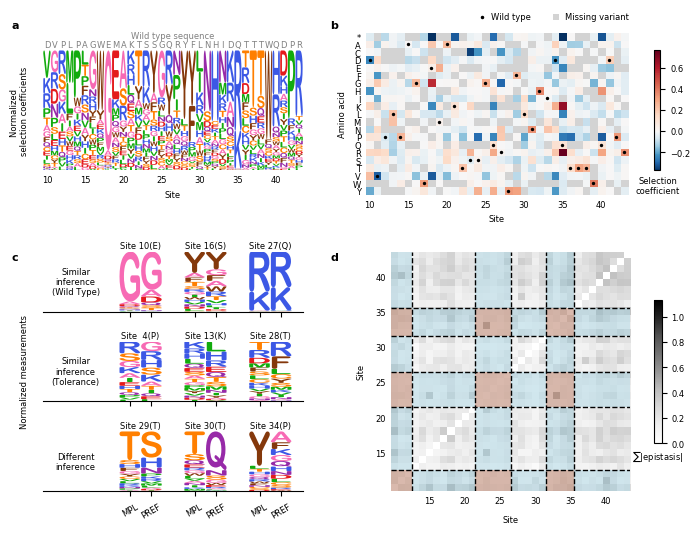

<Figure size 640x480 with 0 Axes>

In [5]:
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

matplotlib.rc_file_defaults()
matplotlib.rcParams.update({'font.size': TEXT_FONTSIZE})
SERIAL_FONT = {
    'size'  : TEXT_FONTSIZE + 2,
    'weight': 'bold'}
OFFSET_LETTER = 0
SELECTION_FILE = PERFORMANCE_DIR_HUMAN+'YAP1/selection_coefficients/YAP1_-4.csv.gz'
EPISTASIS_FILE = './outputs/epistasis/YAP1_-3.txt'
INDEX_FILE = './outputs/epistasis/index_matrix.csv'
SEQUENCE = "DVPLPAGWEMAKTSSGQRYFLNHIDQTTTWQDPR"
PAPER_FIGURE_SIZE_X = 18
PAPER_FIGURE_SIZE_Y = 14
EXAMPLE_FIG_SIZE = (PAPER_FIGURE_SIZE_X*CM,PAPER_FIGURE_SIZE_Y*CM)
fig = plt.figure(figsize=EXAMPLE_FIG_SIZE)

fig.text(0.02, 1-0.06, s='a', **SERIAL_FONT, transform = fig.transFigure)
fig.text(0.47, 1-0.06, s='b', **SERIAL_FONT, transform = fig.transFigure)
fig.text(0.02, 1-0.48, s='c', **SERIAL_FONT, transform = fig.transFigure)
fig.text(0.47, 1-0.48, s='d', **SERIAL_FONT, transform = fig.transFigure)
# Plot correlation across replicates in different experiments

df_da = plot_logo_grid(SELECTION_FILE, EPISTASIS_FILE, INDEX_FILE, SEQUENCE, 10, 35, fig)

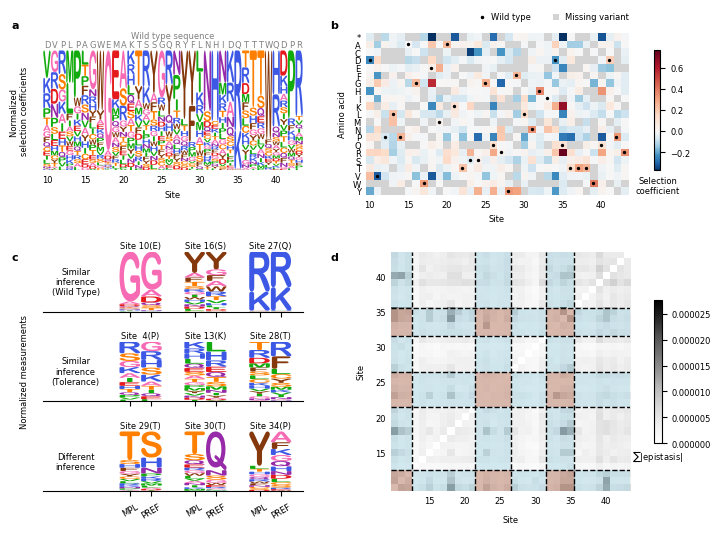

<Figure size 640x480 with 0 Axes>

In [6]:
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

matplotlib.rc_file_defaults()
matplotlib.rcParams.update({'font.size': TEXT_FONTSIZE})
SERIAL_FONT = {
    'size'  : TEXT_FONTSIZE + 2,
    'weight': 'bold'}
OFFSET_LETTER = 0
SELECTION_FILE = PERFORMANCE_DIR_HUMAN+'YAP1/selection_coefficients/YAP1_-4.csv.gz'
EPISTASIS_FILE = './outputs/epistasis/YAP1_100.txt'
INDEX_FILE = './outputs/epistasis/index_matrix.csv'
SEQUENCE = "DVPLPAGWEMAKTSSGQRYFLNHIDQTTTWQDPR"
PAPER_FIGURE_SIZE_X = 18
PAPER_FIGURE_SIZE_Y = 14
EXAMPLE_FIG_SIZE = (PAPER_FIGURE_SIZE_X*CM,PAPER_FIGURE_SIZE_Y*CM)
fig = plt.figure(figsize=EXAMPLE_FIG_SIZE)

fig.text(0.02, 1-0.06, s='a', **SERIAL_FONT, transform = fig.transFigure)
fig.text(0.47, 1-0.06, s='b', **SERIAL_FONT, transform = fig.transFigure)
fig.text(0.02, 1-0.48, s='c', **SERIAL_FONT, transform = Wishing we were in in town cool give it what you took the exit talk to cheat on timefig.transFigure)
fig.text(0.47, 1-0.48, s='d', **SERIAL_FONT, transform = fig.transFigure)
# Plot correlation across replicates in different experiments

df_da = plot_logo_grid(SELECTION_FILE, EPISTASIS_FILE, INDEX_FILE, SEQUENCE, 10, 35, fig)


In [298]:
def plot_logo(selection_file, epistasis_file, index_matrix_file, sequence, exp_scale, sites_per_line, fig, ax, SUBPLOT_POS):
    AA  = sorted(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I','L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V', '*'])
#     print(AA)
    data = pd.read_csv(selection_file)
    site_list = data['site'].unique().tolist()
    rep_list = data.columns[2:]
    ax1=ax[0,0]
    ax2=ax[0,1]
    ax3=ax[1,0]
    ax4=ax[1,1]
    for rep in [rep_list[0]]:
        
# logo plot
        data1 = data[['site', 'amino_acid', rep]]
        data1 = pd.pivot_table(data1, values = rep, index=['site'], columns = ['amino_acid']).reset_index()
        data1.set_index('site', inplace=True)
        data1 = data1.drop(['*'],axis=1)
        totle_line_num = len(data1.columns)
        num_line = int(totle_line_num/sites_per_line)+1
#         ax = fig.add_subplot(gs[:1,:1])
        for i in range(num_line):
            if i != num_line -1:
                data_sub = data1[i*sites_per_line: (i+1)*sites_per_line]               
            else:
                data_sub = data1[i*sites_per_line:]
            site_sub = data_sub.columns.tolist()  

            data_exp = np.exp(exp_scale*data_sub)
            data_exp = data_exp.div(data_exp.sum(axis=1), axis=0)
            
            data_exp = data_exp.replace(np.nan, 0)
            #print(data_exp)

            logo = lm.Logo(data_exp, 
                           ax = ax1,
                           figsize = [15* len(site_sub)/sites_per_line,4],
                           font_name = 'Arial Rounded MT Bold',
                           color_scheme = 'dmslogo_funcgroup')

            logo.style_spines(spines=['right', 'top'], visible=False)
            logo.style_xticks( fmt='%d', anchor=0)
            logo.ax.set_ylabel("Normalized parameters", fontsize = TEXT_FONTSIZE)
            logo.ax.set_xlabel("Site", fontsize = TEXT_FONTSIZE)
        ax1.set_yticks([])
        ax1.spines['left'].set_visible(False)
        ax1.set_xticks([i+data_exp.index.tolist()[0] for i in range(len(data_exp.index.tolist())) if i%3==0])
#         print([i for i in range(len(data_exp.index.tolist())) if i%3==0])
        ax1.set_xticklabels([data_exp.index.tolist()[i] for i in range(len(data_exp.index.tolist())) if i%3==0])
        ax1.yaxis.labelpad = 15
# heatmap
        
        data1 = data[['site', 'amino_acid', rep]]
        data1=pd.pivot_table(data1, values = rep, index=['amino_acid'], columns = 'site').reset_index()
        data1.set_index('amino_acid', inplace=True)
        #print(data1.columns)
        totle_line_num = len(data1.columns)
        num_line = int(totle_line_num/sites_per_line)+1
        for i in range(num_line):
            if i != num_line -1:
                data_sub = data1[data1.columns[i*sites_per_line: (i+1)*sites_per_line]]               
            else:
                data_sub = data1[data1.columns[i*sites_per_line:]]
            site_sub = data_sub.columns.tolist()
            norm = mcolors.DivergingNorm(vcenter=0)
            hm = ax2.imshow(data_sub,cmap='RdBu', norm=norm, aspect='equal')
            clb=fig.colorbar(hm, ax=ax2, orientation='vertical',pad=0.08)
            clb.ax.set_xlabel('Selection\ncoefficient',fontsize=TEXT_FONTSIZE)
            index_of_element_to_outline=[]

            for j in range(len(site_sub)):
                index_of_element_to_outline.append([j-0.5, AA.index(sequence[site_list.index(site_sub[j])])-0.5])
           
            for outliner in index_of_element_to_outline:
                rect = plt.Rectangle(outliner, 1,1, color="green", linewidth=3, fill=False, clip_on=False)
                ax2.add_patch(rect)
        
        ax2.set_xlabel("Site", fontsize = TEXT_FONTSIZE)
        ax2.set_ylabel("Amino acid", fontsize = TEXT_FONTSIZE)
        ax2.set_xticks([i for i in range(len(site_sub)) if i%3==0])
        ax2.set_xticklabels([site_sub[i] for i in range(len(site_sub)) if i%3==0])
        ax2.set_yticks([i for i in range(len(AA))])
        ax2.set_yticklabels([AA[i] for i in range(len(AA))])
        ax2.spines['right'].set_visible(False)
        ax2.spines['top'].set_visible(False)
        ax2.spines['left'].set_visible(False)
        ax2.spines['bottom'].set_visible(False)

        
        
# Comparison Logoplot
        df_enrich = pd.read_csv('./data/human_protein/YAP1/pref/enrichment.csv.gz')
        df_enrich['hgvs_pro'].astype(str)
        df_enrich = df_enrich[~df_enrich['hgvs_pro'].str.contains('\[')]
        df_enrich = df_enrich[df_enrich['hgvs_pro'].str.contains('p.')]

        mutant_list = df_enrich['hgvs_pro'].tolist()
        pref_list = df_enrich['score_101208'].tolist()
        AA_dict = {}
        for aa in AA:
            if aa !='*':
                AA_dict[aa]=[0]*34
        site_lll = set()
        for i in range(len(mutant_list)):
            if mutant_list[i][-1]!='?':
                mutants = mutant_list[i][-3:]
                site_lll.add(int(mutant_list[i][5:-3]))
                short_AA = Amino_acid_dict[mutants]
                if short_AA != '*':
                    if mutant_list[i][5:-3] != '':
                        site = int(mutant_list[i][5:-3])-1
                    AA_dict[short_AA][site]=pref_list[i]

        df_AA = pd.DataFrame(columns=['site', 'amino_acid','pref'])
        exp_scale=10
        site_list = []
        amino_acid_list = []
        pref_list = []
        for aa, pref in AA_dict.items():
            for i in range(len(pref)):
                site_list.append(i+2)
                pref_list.append(pref[i])
                amino_acid_list.append(aa)
        df_AA['site']=site_list
        df_AA['amino_acid']=amino_acid_list
        df_AA['pref']=pref_list
        data2 = pd.pivot_table(df_AA, values ='pref', index=['site'], columns = ['amino_acid']).reset_index()
        data2['site'] = [str(i)+'_Pref' for i in data2['site'].tolist()]

        data = pd.read_csv(SELECTION_FILE)
        site_list = data['site'].unique().tolist()
        rep_list = data.columns[2:]
        ax1=ax[0,0]
        ax2=ax[0,1]
        ax3=ax[1,0]
        ax4=ax[1,1]
        sites_per_line=35
        exp_scale=10
        plt.figure()
        data1 = data[['site', 'amino_acid', 'rep_1']]

        data1 = pd.pivot_table(data1, values = rep, index=['site'], columns = ['amino_acid']).reset_index()
        data1 = data1.drop(['*'],axis=1)
        data1['site'] = [str(i)+'_MPL' for i in data1['site'].tolist()]


        df_all = data1[0:0].copy()
        df_zero = data1[0:1].copy()
        for col in df_zero.columns:
            df_zero[col].values[:] = 0
        selected_rows = [10,16,27,4,13,28,29,30,34]
        # selected_rows = [i+2 for i in range(34)]
        k=10*len(selected_rows)
        for i in selected_rows:
            #MPL
            exp_scale=8
            df_temp = data1[data1['site']==str(i)+'_MPL'].copy()
            temp_pure = df_temp[df_temp.columns[1:]]
            temp_pure = np.exp(exp_scale*temp_pure)
            temp_pure = temp_pure.div(temp_pure.sum(axis=1), axis=0)
            temp_pure['site'] = temp['site']
            df_all = df_all.append(temp_pure)
            
            #PREF
            exp_scale=3
            df_temp = data2[data2['site']==str(i)+'_Pref'].copy()
            temp_pure = df_temp[df_temp.columns[1:]]
            temp_pure = np.exp(exp_scale*temp_pure)
            temp_pure = temp_pure.div(temp_pure.sum(axis=1), axis=0)
            temp_pure['site'] = temp['site']
            df_all = df_all.append(temp_pure)
            df_all = df_all.append(df_zero)

        df_all['plot_site'] = [i for i in range(len(selected_rows)*3)]
        plot_index = df_all['site']
        df_all = df_all.drop(['site'],axis=1)

        df_all.set_index('plot_site', inplace=True)
        total_line_num = len(df_all.columns)
        sites_per_line = int(df_all.shape[0]/3)
        num_line = int(total_line_num/sites_per_line)+1

#         print(total_line_num, sites_per_line, num_line)

        for i in range(num_line):
            if i != num_line -1:
                data_sub = df_all[i*sites_per_line: (i+1)*sites_per_line]               
            else:
                data_sub = df_all[i*sites_per_line:]
            site_sub = data_sub.columns.tolist()  


            logo = lm.Logo(data_sub, 
                           ax=ax3,
                           figsize = [5,2],
                           font_name = 'Arial Rounded MT Bold',
                           color_scheme = 'dmslogo_funcgroup')

            logo.style_spines(spines=['right', 'top'], visible=False)
        #     logo.style_xticks(fmt='%d', rotation=45, anchor=0)
            if i ==1:
                logo.ax.set_ylabel("Normalized parameters", fontsize = TEXT_FONTSIZE, labelpad=10)
            else:
                logo.ax.set_ylabel(" ", fontsize = TEXT_FONTSIZE, labelpad=10)
            if i == 2:
                logo.ax.set_xlabel("Site", fontsize = TEXT_FONTSIZE)
                logo.ax.set_xticklabels(['MPL', 'PREF',' ','MPL', 'PREF',' ','MPL', 'PREF',' '])
            else:
                logo.ax.set_xticklabels(['']*9)        
        
        
      
        
        
        
        
# epistasis
        with open(epistasis_file) as f:
            content = f.readlines()
        content = [float(x.strip()) for x in content]
        df_index = pd.read_csv(index_matrix_file, header=None)
        df_index.rename(columns = {0 : 'state_1', 1 : 'state_2', 2 : 'mat_index'}, inplace = True)
        index_list = df_index['mat_index'].tolist()
        selection_list = [content[i] for i in index_list]
        df_index['selection_coefficients'] = selection_list
        df_index['site_1'] = df_index['state_1']/21+2
        df_index['site_1'] = df_index['site_1'].astype(int)
        df_index['AA_1'] = df_index['state_1']%21
        df_index['AA_1'] = [AA[x] for x in df_index['AA_1'].tolist()]
        df_index['site_2'] = df_index['state_2']/21+2
        df_index['site_2'] = df_index['site_2'].astype(int)
        df_index['AA_2'] = df_index['state_2']%21
        df_index['AA_2'] = [AA[x] for x in df_index['AA_2'].tolist()]

        cols = ['site_1', 'AA_1', 'site_2', 'AA_2']
        df_index['all_variant'] = df_index[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

        WT_list = []; axis_1 = []; axis_2 = []
        for i in range(len(sequence)):
            WT_list.append(i*21+AA.index(sequence[i]))
        df_WT_epi = df_index[(~df_index['state_1'].isin(WT_list))&(~df_index['state_2'].isin(WT_list))&(df_index['state_2']!=df_index['state_1'])]

#         df_WT_epi['variant1'] = df_WT_epi[['site_1', 'AA_1']].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
#         df_WT_epi['variant2'] = df_WT_epi[['site_2', 'AA_2']].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
        df_WT_epi = df_WT_epi.sort_values(['site_1', 'site_2'])

        df_WT_epi['absolute_s'] = np.abs(df_WT_epi['selection_coefficients'])
        df_WT_epi = df_WT_epi.groupby(['site_1', 'site_2'], as_index=False)['absolute_s'].agg('sum')
        df_WT_epi['site_1']+=8
        df_WT_epi['site_2']+=8
        df_WT_epi_ = df_WT_epi.copy()
        df_WT_epi_ = df_WT_epi_.rename(columns={"site_1":"site_2", "site_2":"site_1"})
        df_WT_epi = df_WT_epi.append(df_WT_epi_, ignore_index=True, sort=False)
        flights = df_WT_epi.pivot("site_1", "site_2", "absolute_s")
#         sns.heatmap(flights, linewidths=.5, ax=ax, cmap='Greys',  cbar_kws={'location':'top','label':r'$\sum$|epistasis|', 'shrink': 0.8, 'aspect': 20, 'format': '%.1e'})
        hm = ax4.imshow(flights,cmap='Oranges',aspect='equal')
        ax4.set(xlabel='Site', ylabel='Site')
        ax4.set_xticks([i for i in range(len(site_sub)) if i%3==0])
        ax4.set_xticklabels([site_sub[i] for i in range(len(site_sub)) if i%3==0])
        ax4.set_yticks([i for i in range(len(site_sub)) if i%3==0])
        ax4.set_yticklabels([site_sub[i] for i in range(len(site_sub)) if i%3==0])
        ax4.invert_yaxis()
        ax4.spines['right'].set_visible(False)
        ax4.spines['top'].set_visible(False)
        ax4.spines['left'].set_visible(False)
        ax4.spines['bottom'].set_visible(False)
        clb=fig.colorbar(hm, ax=ax4, orientation='vertical',pad=0.12, format= '%.1e', shrink=0.5)
        clb.ax.set_xlabel(r'$\sum$|epistasis|',fontsize=TEXT_FONTSIZE)



    plt.subplots_adjust(**SUBPLOT_POS)
    fig.savefig('test.png',dpi=400,bbox_inches='tight')
    plt.show()      




TypeError: list indices must be integers or slices, not str

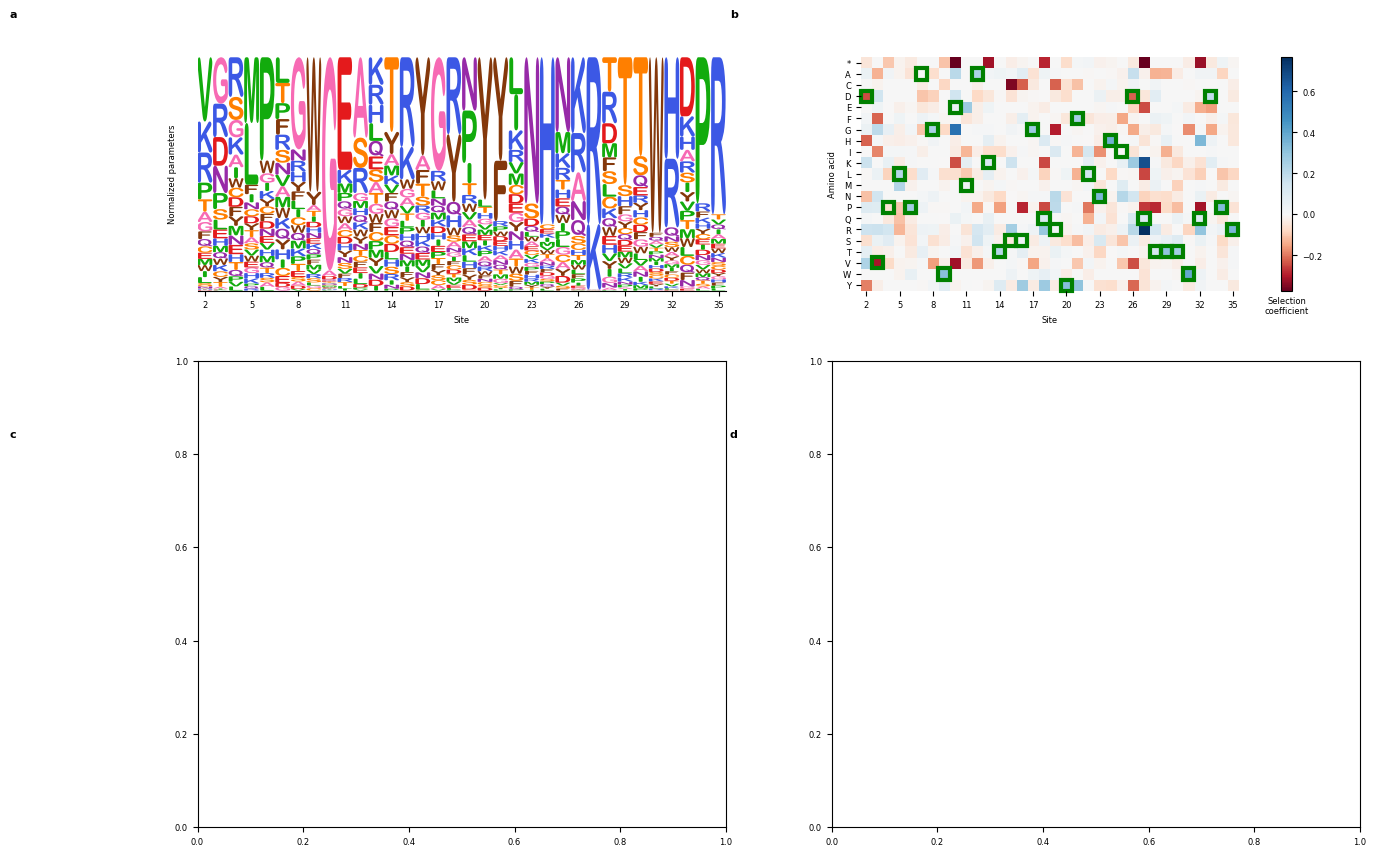

<Figure size 640x480 with 0 Axes>

In [299]:
import matplotlib.colors as mcolors

matplotlib.rc_file_defaults()
matplotlib.rcParams.update({'font.size': TEXT_FONTSIZE})
SERIAL_FONT = {
    'size'  : TEXT_FONTSIZE + 2,
    'weight': 'bold'}
OFFSET_LETTER = 0
SELECTION_FILE = PERFORMANCE_DIR_HUMAN+'YAP1/selection_coefficients/YAP1_-4.csv.gz'
EPISTASIS_FILE = './outputs/epistasis/YAP1_100.txt'
INDEX_FILE = './outputs/epistasis/index_matrix.csv'
SEQUENCE = "DVPLPAGWEMAKTSSGQRYFLNHIDQTTTWQDPR"
EXAMPLE_FIG_SIZE = (15,10)
SUBPLOT_POS = {'left':0.05, 'right':0.9, 'top':0.92, 'bottom':0, 'wspace':0.22, 'hspace':0.25}
fig, ax = plt.subplots(2, 2, figsize=EXAMPLE_FIG_SIZE, gridspec_kw={'height_ratios': [1, 2]})
fig.text(OFFSET_LETTER, 1-0.08, s='a', **SERIAL_FONT, transform = fig.transFigure)
fig.text(0.48+OFFSET_LETTER, 1-0.08, s='b', **SERIAL_FONT, transform = fig.transFigure)
fig.text(OFFSET_LETTER, 1-0.5, s='c', **SERIAL_FONT, transform = fig.transFigure)
fig.text(0.48+OFFSET_LETTER, 1-0.5, s='d', **SERIAL_FONT, transform = fig.transFigure)
# Plot correlation across replicates in different experiments

plot_logo(SELECTION_FILE, EPISTASIS_FILE, INDEX_FILE, SEQUENCE, 10, 35, fig, ax, SUBPLOT_POS)

In [262]:
df_enrich = pd.read_csv('./data/human_protein/Ube4b/pref/enrichment.csv.gz')
df_enrich['hgvs_pro'].astype(str)
df_enrich = df_enrich[~df_enrich['hgvs_pro'].str.contains('\[')]
df_enrich

,accession,hgvs_nt,hgvs_pro,score,SE,epsilon,SE_Rep_2,SE_Rep_3,score_Rep_2,score_Rep_3
0,urn:mavedb:00000004-a-3#1,NaN,_sy,-0.053979,0.002910,1.330000e-18,0.001765,0.003613,-0.056181,-0.050135
30,urn:mavedb:00000004-a-3#31,NaN,p.Arg20Ala,0.121991,0.272315,0.000000e+00,0.049810,0.057705,-0.149546,0.395087
32,urn:mavedb:00000004-a-3#33,NaN,p.Arg20Cys,-0.174738,0.289472,6.620000e-05,0.558008,0.201771,-0.717667,-0.020328
38,urn:mavedb:00000004-a-3#39,NaN,p.Arg20Gln,0.450492,0.006544,1.610000e-11,0.042349,0.006623,0.410192,0.451478
91,urn:mavedb:00000004-a-3#92,NaN,p.Ala16Ser,-0.082856,0.112435,0.000000e+00,0.023833,0.031486,-0.194354,0.030524
465,urn:mavedb:00000004-a-3#466,NaN,p.Arg20Glu,-0.098152,0.168185,3.580000e-10,0.238969,0.236747,-0.259552,0.060260
467,urn:mavedb:00000004-a-3#468,NaN,p.Arg20Gly,-0.118372,0.010530,5.420000e-26,0.066142,0.010666,-0.162144,-0.117234
943,urn:mavedb:00000004-a-3#944,NaN,p.Arg20His,0.152812,0.256131,9.380000e-57,0.523246,0.293727,0.296265,0.107607
949,urn:mavedb:00000004-a-3#950,NaN,p.Arg20Leu,0.412137,0.003671,1.930000e-09,0.050765,0.003672,0.360721,0.412407
1112,urn:mavedb:00000004-a-3#1113,NaN,p.Ala16Glu,-0.030715,0.040074,1.250000e-60,0.072777,0.048008,-0.048870,-0.022815


<Figure size 640x480 with 0 Axes>

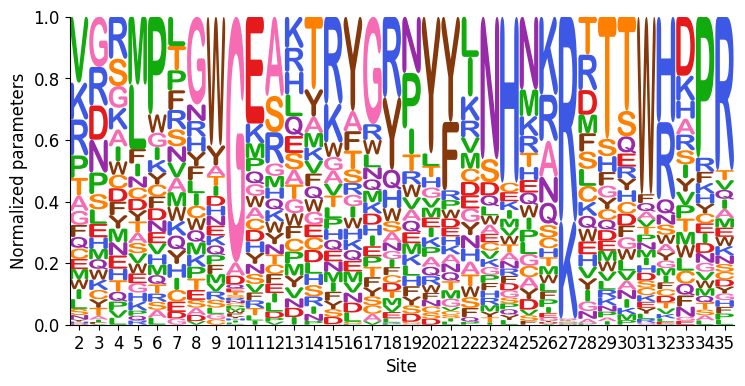

In [213]:
data = pd.read_csv(SELECTION_FILE)
site_list = data['site'].unique().tolist()
rep_list = data.columns[2:]
ax1=ax[0,0]
ax2=ax[0,1]
ax3=ax[1,0]
ax4=ax[1,1]
sites_per_line=35
exp_scale=8
plt.figure()
data1 = data[['site', 'amino_acid', 'rep_1']]
data1 = pd.pivot_table(data1, values = rep, index=['site'], columns = ['amino_acid']).reset_index()
data1.set_index('site', inplace=True)
data1 = data1.drop(['*'],axis=1)

totle_line_num = len(data1.columns)
num_line = int(totle_line_num/sites_per_line)+1
#         ax = fig.add_subplot(gs[:1,:1])
for i in range(num_line):
    if i != num_line -1:
        data_sub = data1[i*sites_per_line: (i+1)*sites_per_line]               
    else:
        data_sub = data1[i*sites_per_line:]
    site_sub = data_sub.columns.tolist()  

    data_exp = np.exp(exp_scale*data_sub)
    data_exp = data_exp.div(data_exp.sum(axis=1), axis=0)

    data_exp = data_exp.replace(np.nan, 0)
    #print(data_exp)

    logo = lm.Logo(data_exp, 

                   figsize = [15* len(site_sub)/sites_per_line,4],
                   font_name = 'Arial Rounded MT Bold',
                   color_scheme = 'dmslogo_funcgroup')

    logo.style_spines(spines=['right', 'top'], visible=False)
    logo.style_xticks( fmt='%d', anchor=0)
    logo.ax.set_ylabel("Normalized parameters", fontsize = TEXT_FONTSIZE)
    logo.ax.set_xlabel("Site", fontsize = TEXT_FONTSIZE)
# data
    #     ax1.set_yticks([])
    #     ax1.spines['left'].set_visible(False)
    #     ax1.set_xticks([i+data_exp.index.tolist()[0] for i in range(len(data_exp.index.tolist())) if i%3==0])
    # #         print([i for i in range(len(data_exp.index.tolist())) if i%3==0])
    #     ax1.set_xticklabels([data_exp.index.tolist()[i] for i in range(len(data_exp.index.tolist())) if i%3==0])
    #     ax1.yaxis.labelpad = 15
    #"DVPL \P A \G \WEM \A\K\T SS \G QR \YF \L\N\HIDQ \T\T\T\W Q \D\P\R"
    # #34 28 29 30  

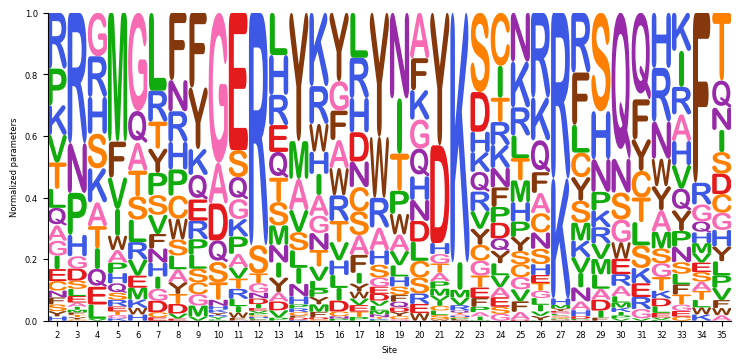

In [18]:
AA  = sorted(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I','L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V', '*'])


Amino_acid_dict = {'Ala':'A',
                   'Arg':'R',
                   'Asn':'N',
                   'Asp':'D',
                   'Cys':'C',
                   'Gln':'Q',
                   'Glu':'E',
                   'Gly':'G',
                   'His':'H',
                   'Ile':'I',
                   'Leu':'L',
                   'Lys':'K',
                   'Met':'M',
                   'Phe':'F',
                   'Pro':'P',
                   'Ser':'S',
                   'Thr':'T',
                   'Trp':'W',
                   'Tyr':'Y',
                   'Val':'V',
                   'Ter':'*'
                  }

df_enrich = pd.read_csv('./data/human_protein/YAP1/pref/enrichment.csv.gz')
df_enrich['hgvs_pro'].astype(str)
df_enrich = df_enrich[~df_enrich['hgvs_pro'].str.contains('\[')]
df_enrich = df_enrich[df_enrich['hgvs_pro'].str.contains('p.')]

mutant_list = df_enrich['hgvs_pro'].tolist()
pref_list = df_enrich['score_101208'].tolist()
AA_dict = {}
for aa in AA:
    if aa !='*':
        AA_dict[aa]=[0]*34
site_lll = set()
for i in range(len(mutant_list)):
    if mutant_list[i][-1]!='?':
        mutants = mutant_list[i][-3:]
        site_lll.add(int(mutant_list[i][5:-3]))
        short_AA = Amino_acid_dict[mutants]
        if short_AA != '*':
            if mutant_list[i][5:-3] != '':
                site = int(mutant_list[i][5:-3])-1
            AA_dict[short_AA][site]=pref_list[i]

df_AA = pd.DataFrame(columns=['site', 'amino_acid','pref'])
exp_scale=1.5
site_list = []
amino_acid_list = []
pref_list = []
for aa, pref in AA_dict.items():
    for i in range(len(pref)):
        site_list.append(i+2)
        pref_list.append(pref[i])
        amino_acid_list.append(aa)
df_AA['site']=site_list
df_AA['amino_acid']=amino_acid_list
df_AA['pref']=pref_list
df_AA
data1 = pd.pivot_table(df_AA, values ='pref', index=['site'], columns = ['amino_acid']).reset_index()
data1.set_index('site', inplace=True)
totle_line_num = len(data1.columns)
sites_per_line=34
num_line = int(totle_line_num/sites_per_line)+1
#         ax = fig.add_subplot(gs[:1,:1])
for i in range(num_line):
    if i != num_line -1:
        data_sub = data1[i*sites_per_line: (i+1)*sites_per_line]               
    else:
        data_sub = data1[i*sites_per_line:]
    site_sub = data_sub.columns.tolist()  

    data_exp = np.exp(exp_scale*data_sub)
    data_exp.replace(1, 0, inplace=True)
    data_exp = data_exp.div(data_exp.sum(axis=1), axis=0)

    data_exp = data_exp.replace(np.nan, 0)
    #print(data_exp)

    logo = lm.Logo(data_exp, 

                   figsize = [15* len(site_sub)/sites_per_line,4],
                   font_name = 'Arial Rounded MT Bold',
                   color_scheme = 'dmslogo_funcgroup')

    logo.style_spines(spines=['right', 'top'], visible=False)
    logo.style_xticks( fmt='%d', anchor=0)
    logo.ax.set_ylabel("Normalized parameters", fontsize = TEXT_FONTSIZE)
    logo.ax.set_xlabel("Site", fontsize = TEXT_FONTSIZE)
    #"DVPLPAGWEMAKTSSGQRYFLNHIDQTTTWQDPR"

In [ ]:
# similar WT     #10,11,27
# similar tolerance     #4,13,28
# different(Pick MPL correct WT inference)  #34, 29,30
fig, ax = plt.subplots(2, 2, figsize=EXAMPLE_FIG_SIZE, gridspec_kw={'height_ratios': [1, 2]})


df_enrich = pd.read_csv('./data/human_protein/YAP1/pref/enrichment.csv.gz')
df_enrich['hgvs_pro'].astype(str)
df_enrich = df_enrich[~df_enrich['hgvs_pro'].str.contains('\[')]
df_enrich = df_enrich[df_enrich['hgvs_pro'].str.contains('p.')]

mutant_list = df_enrich['hgvs_pro'].tolist()
pref_list = df_enrich['score_101208'].tolist()
AA_dict = {}
for aa in AA:
    if aa !='*':
        AA_dict[aa]=[0]*34
site_lll = set()
for i in range(len(mutant_list)):
    if mutant_list[i][-1]!='?':
        mutants = mutant_list[i][-3:]
        site_lll.add(int(mutant_list[i][5:-3]))
        short_AA = Amino_acid_dict[mutants]
        if short_AA != '*':
            if mutant_list[i][5:-3] != '':
                site = int(mutant_list[i][5:-3])-1
            AA_dict[short_AA][site]=pref_list[i]

df_AA = pd.DataFrame(columns=['site', 'amino_acid','pref'])
exp_scale=10
site_list = []
amino_acid_list = []
pref_list = []
for aa, pref in AA_dict.items():
    for i in range(len(pref)):
        site_list.append(i+2)
        pref_list.append(pref[i])
        amino_acid_list.append(aa)
df_AA['site']=site_list
df_AA['amino_acid']=amino_acid_list
df_AA['pref']=pref_list
data2 = pd.pivot_table(df_AA, values ='pref', index=['site'], columns = ['amino_acid']).reset_index()
data2['site'] = [str(i)+'_Pref' for i in data2['site'].tolist()]

data = pd.read_csv(SELECTION_FILE)
site_list = data['site'].unique().tolist()
rep_list = data.columns[2:]

sites_per_line=35
exp_scale=10
plt.figure()
data1 = data[['site', 'amino_acid', 'rep_1']]

data1 = pd.pivot_table(data1, values = rep, index=['site'], columns = ['amino_acid']).reset_index()
data1 = data1.drop(['*'],axis=1)
data1['site'] = [str(i)+'_MPL' for i in data1['site'].tolist()]


df_all = data1[0:0].copy()
df_zero = data1[0:1].copy()
for col in df_zero.columns:
    df_zero[col].values[:] = 0
selected_rows = [10,16,27,4,13,28,29,30,34]
# selected_rows = [i+2 for i in range(34)]
k=10*len(selected_rows)
for i in selected_rows:
    #MPL
    exp_scale=8
    df_temp = data1[data1['site']==str(i)+'_MPL'].copy()
    temp_pure = df_temp[df_temp.columns[1:]]
    temp_pure = np.exp(exp_scale*temp_pure)
    temp_pure = temp_pure.div(temp_pure.sum(axis=1), axis=0)
    temp_pure['site'] = temp['site']
    df_all = df_all.append(temp_pure)

    
    #PREF
    exp_scale=3
    df_temp = data2[data2['site']==str(i)+'_Pref'].copy()
    temp_pure = df_temp[df_temp.columns[1:]]
    temp_pure = np.exp(exp_scale*temp_pure)
    temp_pure = temp_pure.div(temp_pure.sum(axis=1), axis=0)
    temp_pure['site'] = temp['site']
    df_all = df_all.append(temp_pure)
    df_all = df_all.append(df_zero)
    
df_all['plot_site'] = [i for i in range(len(selected_rows)*3)]
plot_index = df_all['site']
df_all = df_all.drop(['site'],axis=1)

df_all.set_index('plot_site', inplace=True)
total_line_num = len(df_all.columns)
sites_per_line = int(df_all.shape[0]/3)
num_line = int(total_line_num/sites_per_line)+1

df_all
print(total_line_num, sites_per_line, num_line)



for i in range(num_line):
    if i != num_line -1:
        data_sub = df_all[i*sites_per_line: (i+1)*sites_per_line]               
    else:
        data_sub = df_all[i*sites_per_line:]
    site_sub = data_sub.columns.tolist()  


    logo = lm.Logo(data_sub, 
                   figsize = [5,2],
                   ax=ax[0,1],
                   font_name = 'Arial Rounded MT Bold',
                   color_scheme = 'dmslogo_funcgroup')

    logo.style_spines(spines=['right', 'top'], visible=False)

    if i ==1:
        logo.ax.set_ylabel("Normalized parameters", fontsize = TEXT_FONTSIZE, labelpad=10)
    else:
        logo.ax.set_ylabel(" ", fontsize = TEXT_FONTSIZE, labelpad=10)
    if i == 2:
        logo.ax.set_xlabel("Site", fontsize = TEXT_FONTSIZE)
        logo.ax.set_xticklabels(['MPL', 'PREF',' ','MPL', 'PREF',' ','MPL', 'PREF',' '])
    else:
        logo.ax.set_xticklabels(['']*9)


In [355]:
df_all

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
plot_site,,,,,,,,,,,,,,,,,,,,
0,0.042869,0.008407,0.028894,0.011805,0.008407,0.797580,0.006937,0.006572,0.001222,0.005238,0.008407,8.429560e-03,0.008407,0.012613,0.008468,0.008970,0.010031,0.000689,0.008407,0.007647
1,0.056980,0.016088,0.046693,0.016088,0.016088,0.772666,0.000440,0.000063,0.000337,0.000018,0.016088,1.301068e-03,0.000009,0.016156,0.000083,0.014086,0.010444,0.000082,0.016088,0.000202
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.065812,0.005831,0.031869,0.034784,0.063144,0.036993,0.035156,0.036924,0.034784,0.030364,0.034784,3.257739e-02,0.003571,0.034784,0.038180,0.044513,0.060724,0.033882,0.035440,0.305885
4,0.059802,0.001753,0.009041,0.045860,0.065957,0.066418,0.016397,0.012246,0.045860,0.012796,0.045860,4.537102e-04,0.000315,0.045860,0.050283,0.045860,0.034030,0.025502,0.057322,0.358384
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.001263,0.001451,0.001043,0.000210,0.001451,0.001224,0.000992,0.001451,0.314412,0.000200,0.001162,7.511352e-04,0.000178,0.003413,0.665360,0.001129,0.001321,0.001034,0.000974,0.000981
7,0.000033,0.007475,0.000006,0.000059,0.007475,0.000051,0.001004,0.007475,0.333254,0.000042,0.000251,8.903084e-07,0.000013,0.007475,0.635178,0.000032,0.000017,0.000004,0.000002,0.000154
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [356]:
logo_df = lm.get_example_matrix('logomaker_logo_matrix',
                                       print_description=True)
logo_df

Description of example matrix "logomaker_logo_matrix":



,L,O,G,m,a,k,e,r
pos,,,,,,,,
0,0.8,0.0,0.0,-0.5,0.0,0.0,0.0,0.0
1,0.0,0.6,0.0,0.0,-0.5,0.0,0.0,0.0
2,0.0,0.0,0.6,0.0,0.0,-0.5,0.0,0.0
3,0.0,0.6,0.0,0.0,0.0,0.0,-0.5,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.5


In [186]:
def plot_logo_grid(selection_file, epistasis_file, index_matrix_file, sequence, exp_scale, sites_per_line, fig):
    AA  = sorted(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I','L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V', '*'])
#     print(AA)
    Amino_acid_dict = {'Ala':'A',
                       'Arg':'R',
                       'Asn':'N',
                       'Asp':'D',
                       'Cys':'C',
                       'Gln':'Q',
                       'Glu':'E',
                       'Gly':'G',
                       'His':'H',
                       'Ile':'I',
                       'Leu':'L',
                       'Lys':'K',
                       'Met':'M',
                       'Phe':'F',
                       'Pro':'P',
                       'Ser':'S',
                       'Thr':'T',
                       'Trp':'W',
                       'Tyr':'Y',
                       'Val':'V',
                       'Ter':'*'
                      }

    text_in_figure={
        'fontsize': TEXT_FONTSIZE,
        'bbox': {'facecolor':'none', 'edgecolor':'none','boxstyle':'round'},
        'ha': 'center',
        'va': 'center'
    }
    data = pd.read_csv(selection_file)
    site_list = data['site'].unique().tolist()
    rep_list = data.columns[2:]
    gs = fig.add_gridspec(5, 6, 
                          wspace=1.5, 
                          hspace=2, 
                          width_ratios=[1,1,1,1.6,1.6,1.6], 
                          height_ratios=[1.2,1.2,1.6,1.6,1.6])
    ax1 = fig.add_subplot(gs[:2, :3])
    ax2 = fig.add_subplot(gs[:2, 3:])
    ax3 = fig.add_subplot(gs[2:, :3])
    ax4 = fig.add_subplot(gs[2:, 3:])
    MPL_scale=8
    PREF_scale=1.5
    for rep in [rep_list[0]]:
# logo plot
        data1 = data[['site', 'amino_acid', rep]]
        data1 = pd.pivot_table(data1, values = rep, index=['site'], columns = ['amino_acid']).reset_index()
        data1.set_index('site', inplace=True)
        data1 = data1.drop(['*'],axis=1)
        totle_line_num = len(data1.columns)
        num_line = int(totle_line_num/sites_per_line)+1
#         ax = fig.add_subplot(gs[:1,:1])
        for i in range(num_line):
            if i != num_line -1:
                data_sub = data1[i*sites_per_line: (i+1)*sites_per_line]               
            else:
                data_sub = data1[i*sites_per_line:]
            site_sub = data_sub.columns.tolist()  

            data_exp = np.exp(MPL_scale*data_sub)
            data_exp = data_exp.div(data_exp.sum(axis=1), axis=0)
            
            data_exp = data_exp.replace(np.nan, 0)
            #print(data_exp)

            logo = lm.Logo(data_exp, 
                           ax = ax1,
                           figsize = [15* len(site_sub)/sites_per_line,4],
                           font_name = 'Arial Rounded MT Bold',
                           color_scheme = 'dmslogo_funcgroup')

            logo.style_spines(spines=['right', 'top'], visible=False)
            logo.style_xticks( fmt='%d', anchor=0)
            logo.ax.set_ylabel("Normalized selection coefficients", fontsize = TEXT_FONTSIZE)
            logo.ax.set_xlabel("Site", fontsize = TEXT_FONTSIZE)
#             logo.ax.text(18.5, 1.05, sequence, **text_in_figure, cex=8)
            for j in range(len(sequence)):
                logo.ax.text(j+2, 1.05, sequence[j], **text_in_figure, color='grey')
            logo.ax.text(18.5, 1.125, 'Wild type sequence', **text_in_figure, color='grey') 
        ax1.set_yticks([])
        ax1.spines['left'].set_visible(False)
        ax1.set_xticks([i+data_exp.index.tolist()[0] for i in range(len(data_exp.index.tolist())) if i%3==0])
        ax1.set_xticklabels([data_exp.index.tolist()[i] for i in range(len(data_exp.index.tolist())) if i%3==0])
        ax1.yaxis.labelpad = 20
        
        
        
# heatmap
        left_n=8
        data1 = data[['site', 'amino_acid', rep]]
        data1=pd.pivot_table(data1, values = rep, index=['amino_acid'], columns = 'site').reset_index()
        data1.set_index('amino_acid', inplace=True)
        #print(data1.columns)
        totle_line_num = len(data1.columns)
        num_line = int(totle_line_num/sites_per_line)+1
        for i in range(num_line):
            if i != num_line -1:
                data_sub = data1[data1.columns[i*sites_per_line: (i+1)*sites_per_line]]               
            else:
                data_sub = data1[data1.columns[i*sites_per_line:]]
            site_sub = data_sub.columns.tolist()
            norm = mcolors.DivergingNorm(vcenter=0)
            hm = ax2.imshow(data_sub,
                            cmap='RdBu', 
                            norm=norm, 
                            aspect='equal',
                            extent=(-0.5-left_n, data_sub.shape[1]-0.5-left_n, data_sub.shape[0]-0.5, -0.5))
            
            clb=fig.colorbar(hm, ax=ax2, orientation='vertical',pad=0.1)
            clb.ax.set_xlabel('Selection\ncoefficient',fontsize=TEXT_FONTSIZE)
            index_of_element_to_outline=[]

            for j in range(len(site_sub)):
                index_of_element_to_outline.append([j-0.5-left_n, AA.index(sequence[site_list.index(site_sub[j])])-0.5])
           
            for outliner in index_of_element_to_outline:
                rect = plt.Rectangle(outliner, 1,1, color="green", linewidth=3, fill=False, clip_on=False)
                ax2.add_patch(rect)
        for j in range(len(sequence)):
            ax2.text(j-left_n, -1.5, sequence[j], **text_in_figure, color='grey') 
        ax2.text(16.5-left_n, -3, 'Wild type sequence', **text_in_figure, color='grey') 
        ax2.set_xlabel("Site", fontsize = TEXT_FONTSIZE)
        ax2.set_ylabel("Amino acid", fontsize = TEXT_FONTSIZE)
        ax2.set_xticks([i-left_n for i in range(len(site_sub)) if i%3==0])
        ax2.set_xticklabels([site_sub[i] for i in range(len(site_sub)) if i%3==0])
        ax2.set_yticks([i for i in range(len(AA))])
        ax2.set_yticklabels([AA[i] for i in range(len(AA))])
        ax2.spines['right'].set_visible(False)
        ax2.spines['top'].set_visible(False)
        ax2.spines['left'].set_visible(False)
        ax2.spines['bottom'].set_visible(False)

        
        
# Comparison Logoplot

        inner = gridspec.GridSpecFromSubplotSpec(3, 1,
                            subplot_spec=ax3, wspace=0.1, hspace=0.5)
        
        df_enrich = pd.read_csv('./data/human_protein/YAP1/pref/enrichment.csv.gz')
        df_enrich['hgvs_pro'].astype(str)
        df_enrich = df_enrich[~df_enrich['hgvs_pro'].str.contains('\[')]
        df_enrich = df_enrich[df_enrich['hgvs_pro'].str.contains('p.')]

        mutant_list = df_enrich['hgvs_pro'].tolist()
        pref_list = df_enrich['score_101208'].tolist()
        AA_dict = {}
        for aa in AA:
            if aa !='*':
                AA_dict[aa]=[0]*34
        site_lll = set()
        for i in range(len(mutant_list)):
            if mutant_list[i][-1]!='?':
                mutants = mutant_list[i][-3:]
                site_lll.add(int(mutant_list[i][5:-3]))
                short_AA = Amino_acid_dict[mutants]
                if short_AA != '*':
                    if mutant_list[i][5:-3] != '':
                        site = int(mutant_list[i][5:-3])-1
                    AA_dict[short_AA][site]=pref_list[i]

        df_AA = pd.DataFrame(columns=['site', 'amino_acid','pref'])
        site_list = []
        amino_acid_list = []
        pref_list = []
        for aa, pref in AA_dict.items():
            for i in range(len(pref)):
                site_list.append(i+2)
                pref_list.append(pref[i])
                amino_acid_list.append(aa)
        df_AA['site']=site_list
        df_AA['amino_acid']=amino_acid_list
        df_AA['pref']=pref_list
        data2 = pd.pivot_table(df_AA, values ='pref', index=['site'], columns = ['amino_acid']).reset_index()
        data2['site'] = [str(i)+'_Pref' for i in data2['site'].tolist()]

        data = pd.read_csv(SELECTION_FILE)
        site_list = data['site'].unique().tolist()
        rep_list = data.columns[2:]

        sites_per_line=35
        exp_scale=10
        plt.figure()
        data1 = data[['site', 'amino_acid', 'rep_1']]

        data1 = pd.pivot_table(data1, values = rep, index=['site'], columns = ['amino_acid']).reset_index()
        data1 = data1.drop(['*'],axis=1)
        data1['site'] = [str(i)+'_MPL' for i in data1['site'].tolist()]


        df_all = data1[0:0].copy()
        df_zero = data1[0:1].copy()
        for col in df_zero.columns:
            df_zero[col].values[:] = 0
        selected_rows = [10,16,27,4,13,28,29,30,34]
        # selected_rows = [i+2 for i in range(34)]
        k=10*len(selected_rows)
        m=0
        for i in selected_rows:
            #MPL
            if m%3==0:
                df_all = df_all.append(df_zero)
            m+=1
            df_all = df_all.append(df_zero)
            df_temp = data1[data1['site']==str(i)+'_MPL'].copy()
            temp_pure = df_temp[df_temp.columns[1:]]
            temp_pure = np.exp(MPL_scale*temp_pure)
            temp_pure = temp_pure.div(temp_pure.sum(axis=1), axis=0)
#             temp_pure['site'] = temp['site']
            df_all = df_all.append(temp_pure)
            
            #PREF

            df_temp = data2[data2['site']==str(i)+'_Pref'].copy()
            temp_pure = df_temp[df_temp.columns[1:]]
            temp_pure = np.exp(PREF_scale*temp_pure)
            temp_pure = temp_pure.div(temp_pure.sum(axis=1), axis=0)
#             temp_pure['site'] = temp['site']
            df_all = df_all.append(temp_pure)
            

        df_all['plot_site'] = [i for i in range(10)]+[i for i in range(10)]+[i for i in range(10)]
        plot_index = df_all['site']
        df_all = df_all.drop(['site'],axis=1)

        df_all.set_index('plot_site', inplace=True)
        total_line_num = len(df_all.columns)
        sites_per_line = int(df_all.shape[0]/3)
        num_line = int(total_line_num/sites_per_line)+1
        ax3.set_yticks([])
        ax3.set_xticks([])
        
        ax3.spines['top'].set_visible(False)
        ax3.spines['right'].set_visible(False)
        ax3.spines['bottom'].set_visible(False)
        ax3.spines['left'].set_visible(False)

        for i in range(num_line):
            ax3_sub = plt.Subplot(fig, inner[i])
            if i != num_line -1:
                data_sub = df_all[i*sites_per_line: (i+1)*sites_per_line].copy()              
            else:
                data_sub = df_all[i*sites_per_line:].copy()
            site_sub = data_sub.columns.tolist()  


            logo = lm.Logo(data_sub, 
                           ax=ax3_sub,
                           figsize = [5,2],
                           font_name = 'Arial Rounded MT Bold',
                           color_scheme = 'dmslogo_funcgroup')

            logo.style_spines(spines=['right', 'top'], visible=False)
            logo.ax.set_xlim([-2,10])
#             logo.ax.tick_params(bottom=False)
        #     logo.style_xticks(fmt='%d', rotation=45, anchor=0)
            if i == 0:
                logo.ax.text(2.5, 1.1, 'Site 10(E)', **text_in_figure)
                logo.ax.text(5.5, 1.1, 'Site 16(S)', **text_in_figure)
                logo.ax.text(8.5, 1.1, 'Site 27(Q)', **text_in_figure)
                logo.ax.text(-.5, .5, 'Similar\ninference\n(Wild Type)', **text_in_figure)
                
            if i == 1:
                logo.ax.text(2.5, 1.1, 'Site  4(P)', **text_in_figure)
                logo.ax.text(5.5, 1.1, 'Site 13(K)', **text_in_figure)
                logo.ax.text(8.5, 1.1, 'Site 28(T)', **text_in_figure)
                logo.ax.set_ylabel("Normalized measurements", fontsize = TEXT_FONTSIZE, labelpad=20)
                logo.ax.text(-.5, .5, 'Similar\ninference\n(Tolerance)', 
                             fontsize = TEXT_FONTSIZE, 
                             bbox=dict(facecolor='none', 
                                       edgecolor='none', 
                                       boxstyle='round'), 
                             ha='center', va='center')

            else:
                logo.ax.set_ylabel(" ", fontsize = TEXT_FONTSIZE, labelpad=3)
            if i == 2:
                logo.ax.text(2.5, 1.1, 'Site 29(T)', **text_in_figure)
                logo.ax.text(5.5, 1.1, 'Site 30(T)', **text_in_figure)
                logo.ax.text(8.5, 1.1, 'Site 34(P)', **text_in_figure)
                logo.ax.text(-.5, .5, 'Different\ninference', 
                             fontsize = TEXT_FONTSIZE, 
                             bbox=dict(facecolor='none', 
                                       edgecolor='none', 
                                       boxstyle='round'), 
                             ha='center', va='center')
#                 logo.ax.set_xlabel("Site", fontsize = TEXT_FONTSIZE)

#                 logo.ax.set_xticks([2,2.5,3,4,5,5.5,6,7,8,8.5,9])
#                 logo.ax.set_xticklabels(['MPL', '\nSite 29','PREF', ' ', 'MPL', '\nSite 30','PREF', ' ', 'MPL','\nSite 34', 'PREF'], linespacing=1.5)

                logo.ax.set_xticks([2,3,4,5,6,7,8,9])
                logo.ax.set_xticklabels(['MPL', 'PREF', ' ', 'MPL', 'PREF', ' ', 'MPL', 'PREF'], linespacing=1.5, rotation=30)

                logo.ax.xaxis.get_major_ticks()[2].set_visible(False)
                logo.ax.xaxis.get_major_ticks()[5].set_visible(False)
            else:
            
                logo.ax.set_xticks([i for i in range(2,10)])
                logo.ax.set_xticklabels([' ']*8)
                logo.ax.xaxis.get_major_ticks()[2].set_visible(False)
                logo.ax.xaxis.get_major_ticks()[5].set_visible(False)
            logo.ax.set_yticks([])
            logo.ax.spines['left'].set_visible(False)
            fig.add_subplot(ax3_sub)
#             fig.subplots_adjust(hspace=1.5)
        
        
        
# epistasis
        with open(epistasis_file) as f:
            content = f.readlines()
        content = [float(x.strip()) for x in content]
        df_index = pd.read_csv(index_matrix_file, header=None)
        df_index.rename(columns = {0 : 'state_1', 1 : 'state_2', 2 : 'mat_index'}, inplace = True)
        index_list = df_index['mat_index'].tolist()
        selection_list = [content[i] for i in index_list]
        df_index['selection_coefficients'] = selection_list
        df_index['site_1'] = df_index['state_1']/21+2
        df_index['site_1'] = df_index['site_1'].astype(int)
        df_index['AA_1'] = df_index['state_1']%21
        df_index['AA_1'] = [AA[x] for x in df_index['AA_1'].tolist()]
        df_index['site_2'] = df_index['state_2']/21+2
        df_index['site_2'] = df_index['site_2'].astype(int)
        df_index['AA_2'] = df_index['state_2']%21
        df_index['AA_2'] = [AA[x] for x in df_index['AA_2'].tolist()]

        cols = ['site_1', 'AA_1', 'site_2', 'AA_2']
        df_index['all_variant'] = df_index[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

        WT_list = []; axis_1 = []; axis_2 = []
        for i in range(len(sequence)):
            WT_list.append(i*21+AA.index(sequence[i]))
        df_WT_epi = df_index[(~df_index['state_1'].isin(WT_list))&(~df_index['state_2'].isin(WT_list))&(df_index['state_2']!=df_index['state_1'])]

#         df_WT_epi['variant1'] = df_WT_epi[['site_1', 'AA_1']].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
#         df_WT_epi['variant2'] = df_WT_epi[['site_2', 'AA_2']].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
        df_WT_epi = df_WT_epi.sort_values(['site_1', 'site_2'])

        df_WT_epi['absolute_s'] = np.abs(df_WT_epi['selection_coefficients'])
        df_WT_epi = df_WT_epi.groupby(['site_1', 'site_2'], as_index=False)['absolute_s'].agg('sum')
        df_WT_epi['site_1']+=8
        df_WT_epi['site_2']+=8
        df_WT_epi_ = df_WT_epi.copy()
        df_WT_epi_ = df_WT_epi_.rename(columns={"site_1":"site_2", "site_2":"site_1"})
        df_WT_epi = df_WT_epi.append(df_WT_epi_, ignore_index=True, sort=False)
        flights = df_WT_epi.pivot("site_1", "site_2", "absolute_s")
#         sns.heatmap(flights, linewidths=.5, ax=ax, cmap='Greys',  cbar_kws={'location':'top','label':r'$\sum$|epistasis|', 'shrink': 0.8, 'aspect': 20, 'format': '%.1e'})
        hm = ax4.imshow(flights,cmap='Oranges',aspect='equal')
        ax4.spines['right'].set_visible(False)
        ax4.spines['top'].set_visible(False)
        ax4.spines['left'].set_visible(False)
        ax4.spines['bottom'].set_visible(False)
        ax4.set(xlabel='Site', ylabel='Site')
        ax4.set_xticks([i for i in range(len(sequence)) if i%3==0])
        ax4.set_xticklabels([i+2 for i in range(len(sequence)) if i%3==0])
        ax4.set_yticks([i for i in range(len(sequence)) if i%3==0])
        ax4.set_yticklabels([i+2 for i in range(len(sequence)) if i%3==0])
        ax4.invert_yaxis()
        ax4.patch.set_edgecolor('cornflowerblue')
        print(site_sub)
        clb=fig.colorbar(hm, ax=ax4, orientation='vertical',pad=0.12, format= '%.1e', shrink=0.6)
        clb.ax.set_xlabel(r'$\sum$|epistasis|',fontsize=TEXT_FONTSIZE)
        


#     plt.subplots_adjust(**SUBPLOT_POS)
    plt.tight_layout()
    fig.savefig('test.png',dpi=400,bbox_inches='tight')
    plt.show()      



['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']


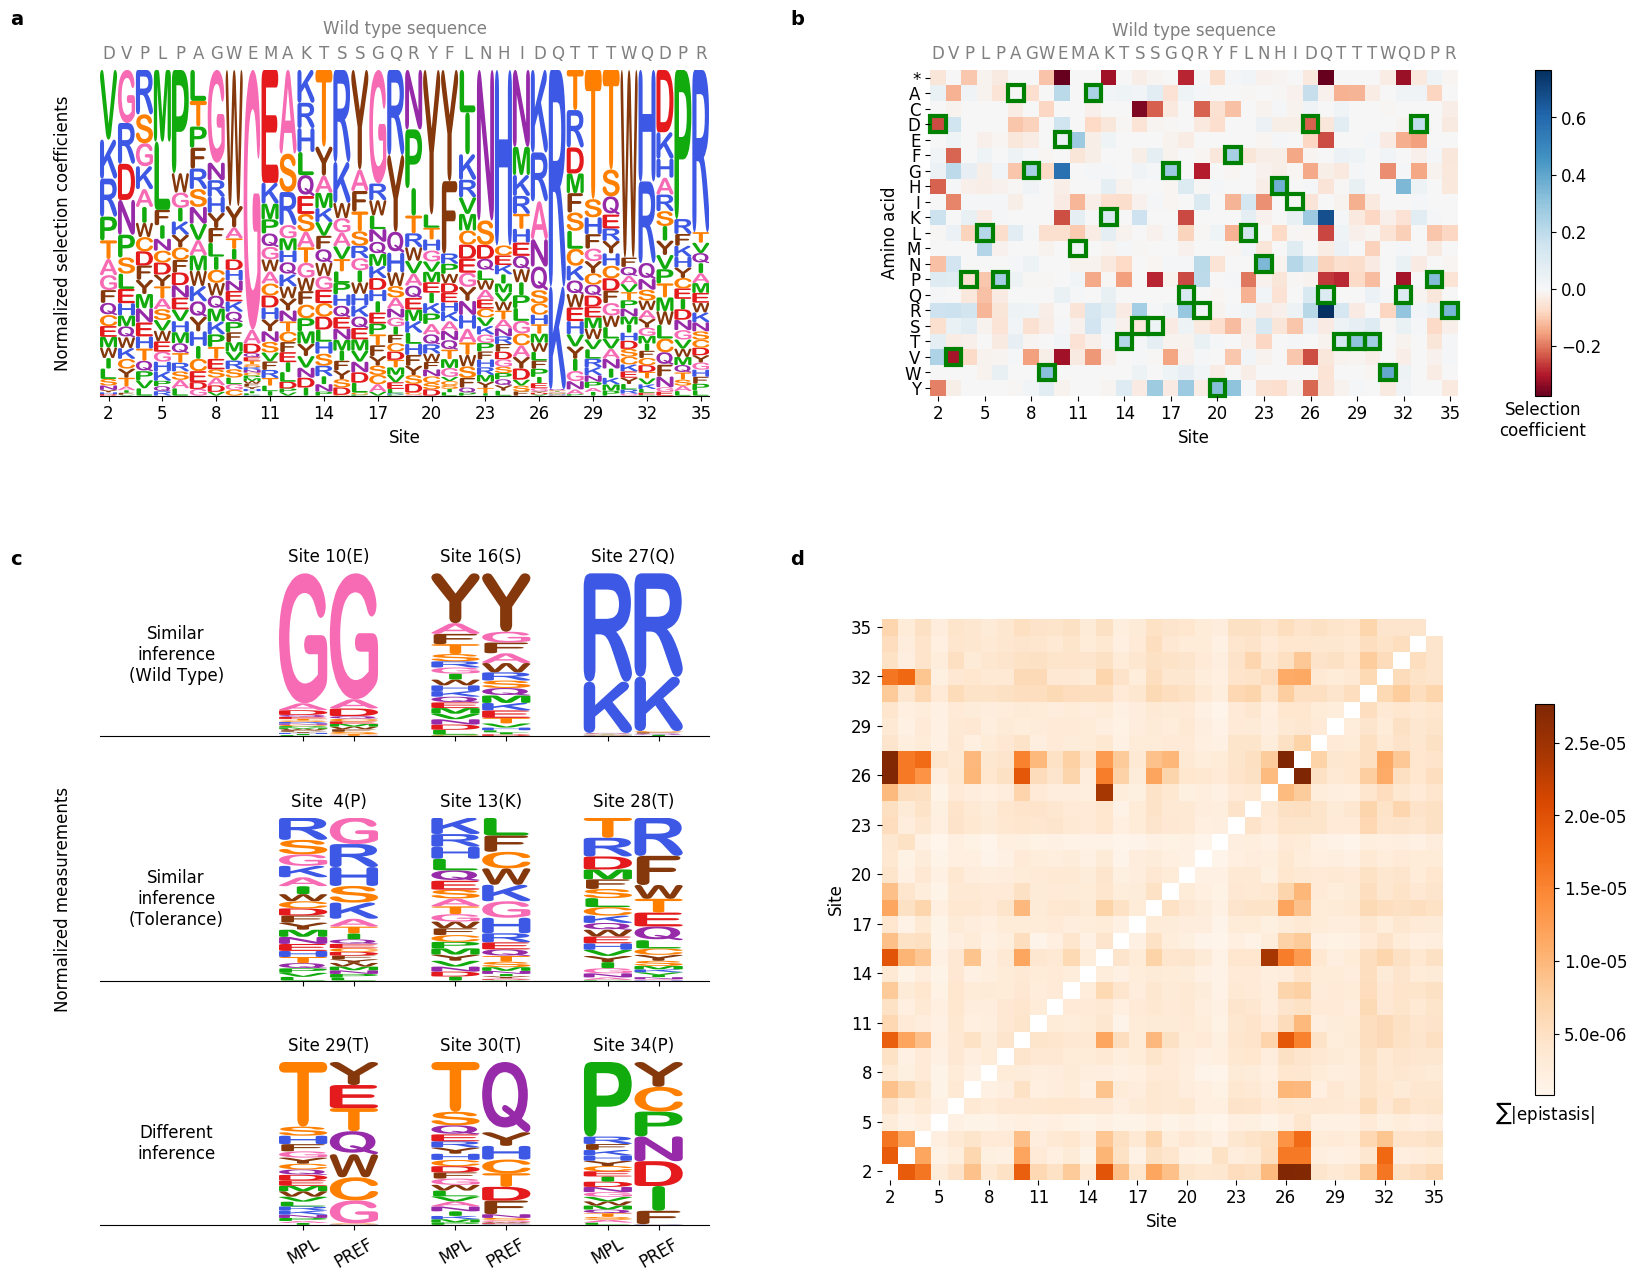

<Figure size 640x480 with 0 Axes>

In [187]:
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec

matplotlib.rc_file_defaults()
matplotlib.rcParams.update({'font.size': TEXT_FONTSIZE})
SERIAL_FONT = {
    'size'  : TEXT_FONTSIZE + 2,
    'weight': 'bold'}
OFFSET_LETTER = 0
SELECTION_FILE = PERFORMANCE_DIR_HUMAN+'YAP1/selection_coefficients/YAP1_-4.csv.gz'
EPISTASIS_FILE = './outputs/epistasis/YAP1_100.txt'
INDEX_FILE = './outputs/epistasis/index_matrix.csv'
SEQUENCE = "DVPLPAGWEMAKTSSGQRYFLNHIDQTTTWQDPR"
EXAMPLE_FIG_SIZE = (20,15)
fig = plt.figure(figsize=EXAMPLE_FIG_SIZE)

fig.text(0.08+OFFSET_LETTER, 1-0.09, s='a', **SERIAL_FONT, transform = fig.transFigure)
fig.text(0.47+OFFSET_LETTER, 1-0.09, s='b', **SERIAL_FONT, transform = fig.transFigure)
fig.text(0.08+OFFSET_LETTER, 1-0.45, s='c', **SERIAL_FONT, transform = fig.transFigure)
fig.text(0.47+OFFSET_LETTER, 1-0.45, s='d', **SERIAL_FONT, transform = fig.transFigure)
# Plot correlation across replicates in different experiments

plot_logo_grid(SELECTION_FILE, EPISTASIS_FILE, INDEX_FILE, SEQUENCE, 10, 35, fig)

In [495]:
df_all

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
plot_site,,,,,,,,,,,,,,,,,,,,
0,0.042869,0.008407,0.028894,0.011805,0.008407,0.797580,0.006937,0.006572,0.001222,0.005238,0.008407,8.429560e-03,0.008407,0.012613,0.008468,0.008970,0.010031,0.000689,0.008407,0.007647
1,0.056980,0.016088,0.046693,0.016088,0.016088,0.772666,0.000440,0.000063,0.000337,0.000018,0.016088,1.301068e-03,0.000009,0.016156,0.000083,0.014086,0.010444,0.000082,0.016088,0.000202
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.065812,0.005831,0.031869,0.034784,0.063144,0.036993,0.035156,0.036924,0.034784,0.030364,0.034784,3.257739e-02,0.003571,0.034784,0.038180,0.044513,0.060724,0.033882,0.035440,0.305885
4,0.059802,0.001753,0.009041,0.045860,0.065957,0.066418,0.016397,0.012246,0.045860,0.012796,0.045860,4.537102e-04,0.000315,0.045860,0.050283,0.045860,0.034030,0.025502,0.057322,0.358384
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.001263,0.001451,0.001043,0.000210,0.001451,0.001224,0.000992,0.001451,0.314412,0.000200,0.001162,7.511352e-04,0.000178,0.003413,0.665360,0.001129,0.001321,0.001034,0.000974,0.000981
7,0.000033,0.007475,0.000006,0.000059,0.007475,0.000051,0.001004,0.007475,0.333254,0.000042,0.000251,8.903084e-07,0.000013,0.007475,0.635178,0.000032,0.000017,0.000004,0.000002,0.000154
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


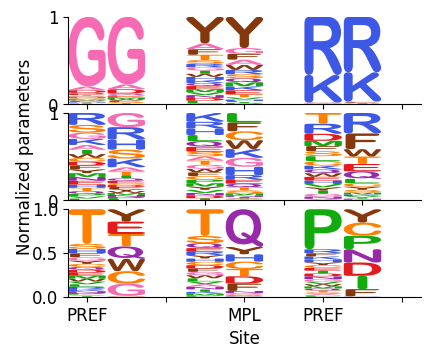

<Figure size 640x480 with 0 Axes>

In [398]:
fig = plt.figure(figsize=(10, 8))
ax3 = gridspec.GridSpec(2, 2, wspace=0.2, hspace=0.2)

inner = gridspec.GridSpecFromSubplotSpec(3, 1,
                    subplot_spec=ax3[1], wspace=0.1, hspace=0.1)

df_enrich = pd.read_csv('./data/human_protein/YAP1/pref/enrichment.csv.gz')
df_enrich['hgvs_pro'].astype(str)
df_enrich = df_enrich[~df_enrich['hgvs_pro'].str.contains('\[')]
df_enrich = df_enrich[df_enrich['hgvs_pro'].str.contains('p.')]

mutant_list = df_enrich['hgvs_pro'].tolist()
pref_list = df_enrich['score_101208'].tolist()
AA_dict = {}
for aa in AA:
    if aa !='*':
        AA_dict[aa]=[0]*34
site_lll = set()
for i in range(len(mutant_list)):
    if mutant_list[i][-1]!='?':
        mutants = mutant_list[i][-3:]
        site_lll.add(int(mutant_list[i][5:-3]))
        short_AA = Amino_acid_dict[mutants]
        if short_AA != '*':
            if mutant_list[i][5:-3] != '':
                site = int(mutant_list[i][5:-3])-1
            AA_dict[short_AA][site]=pref_list[i]

df_AA = pd.DataFrame(columns=['site', 'amino_acid','pref'])
exp_scale=10
site_list = []
amino_acid_list = []
pref_list = []
for aa, pref in AA_dict.items():
    for i in range(len(pref)):
        site_list.append(i+2)
        pref_list.append(pref[i])
        amino_acid_list.append(aa)
df_AA['site']=site_list
df_AA['amino_acid']=amino_acid_list
df_AA['pref']=pref_list
data2 = pd.pivot_table(df_AA, values ='pref', index=['site'], columns = ['amino_acid']).reset_index()
data2['site'] = [str(i)+'_Pref' for i in data2['site'].tolist()]

data = pd.read_csv(SELECTION_FILE)
site_list = data['site'].unique().tolist()
rep_list = data.columns[2:]

sites_per_line=35
exp_scale=10
plt.figure()
data1 = data[['site', 'amino_acid', 'rep_1']]

data1 = pd.pivot_table(data1, values = rep, index=['site'], columns = ['amino_acid']).reset_index()
data1 = data1.drop(['*'],axis=1)
data1['site'] = [str(i)+'_MPL' for i in data1['site'].tolist()]


df_all = data1[0:0].copy()
df_zero = data1[0:1].copy()
for col in df_zero.columns:
    df_zero[col].values[:] = 0
selected_rows = [10,16,27,4,13,28,29,30,34]
# selected_rows = [i+2 for i in range(34)]
k=10*len(selected_rows)
for i in selected_rows:
    #MPL
    exp_scale=8
    df_temp = data1[data1['site']==str(i)+'_MPL'].copy()
    temp_pure = df_temp[df_temp.columns[1:]]
    temp_pure = np.exp(exp_scale*temp_pure)
    temp_pure = temp_pure.div(temp_pure.sum(axis=1), axis=0)
    temp_pure['site'] = temp['site']
    df_all = df_all.append(temp_pure)

    #PREF
    exp_scale=3
    df_temp = data2[data2['site']==str(i)+'_Pref'].copy()
    temp_pure = df_temp[df_temp.columns[1:]]
    temp_pure = np.exp(exp_scale*temp_pure)
    temp_pure = temp_pure.div(temp_pure.sum(axis=1), axis=0)
    temp_pure['site'] = temp['site']
    df_all = df_all.append(temp_pure)
    df_all = df_all.append(df_zero)

df_all['plot_site'] = [i for i in range(len(selected_rows)*3)]
plot_index = df_all['site']
df_all = df_all.drop(['site'],axis=1)

df_all.set_index('plot_site', inplace=True)
total_line_num = len(df_all.columns)
sites_per_line = int(df_all.shape[0]/3)
num_line = int(total_line_num/sites_per_line)+1


for i in range(num_line):
    ax3_sub = plt.Subplot(fig, inner[i])
    if i != num_line -1:
        data_sub = df_all[i*sites_per_line: (i+1)*sites_per_line]               
    else:
        data_sub = df_all[i*sites_per_line:]
    site_sub = data_sub.columns.tolist()  


    logo = lm.Logo(data_sub, 
                   ax=ax3_sub,
                   figsize = [5,2],
                   font_name = 'Arial Rounded MT Bold',
                   color_scheme = 'dmslogo_funcgroup')

    logo.style_spines(spines=['right', 'top'], visible=False)
#     logo.style_xticks(fmt='%d', rotation=45, anchor=0)
    if i ==1:
        logo.ax.set_ylabel("Normalized parameters", fontsize = TEXT_FONTSIZE, labelpad=10)
    else:
        logo.ax.set_ylabel(" ", fontsize = TEXT_FONTSIZE, labelpad=3)
    if i == 2:
        logo.ax.set_xlabel("Site", fontsize = TEXT_FONTSIZE)
        logo.ax.set_xticklabels(['MPL', 'PREF',' ','MPL', 'PREF',' ','MPL', 'PREF',' '])
    else:
        logo.ax.set_xticklabels(['']*9)   
    fig.add_subplot(ax3_sub)

plt.show()